___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [26]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1021,485,Spain,Male,32,6,102238.010,2,1,1,194010.120,0
6919,782,France,Male,33,7,191523.090,1,1,1,167058.750,0
178,597,Spain,Female,40,8,101993.120,1,0,1,94774.120,0
8606,807,Spain,Male,42,5,0.000,2,1,1,74900.900,0
5307,534,France,Female,49,7,0.000,1,1,0,13566.480,1
1048,812,Germany,Male,25,5,54817.550,1,1,0,131660.310,0
1553,592,France,Female,38,8,119278.010,2,0,1,19370.730,0
9922,667,France,Male,36,8,139753.350,1,1,0,79871.160,0
2742,649,France,Female,41,2,125785.230,1,1,1,70523.920,0
1868,656,France,Male,36,8,97786.080,2,0,1,21478.360,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [24]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
#df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [22]:
df = df.drop(['Surname'], axis=1)

In [23]:
df.shape

(10000, 11)

In [28]:
print(df['Geography'].unique())
#print(df.Courses.unique())

['France' 'Spain' 'Germany']


In [31]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)#.set_output(transform="pandas")

In [32]:
enc.fit_transform(df[["Geography"]])

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [37]:
enc.fit_transform(df[["Gender"]])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [40]:
def change(x):
    if x == "Germany":
        return 0
    elif x == 'France':
        return 1
    else:
        return 2

In [41]:
df["Geography"] = df["Geography"].apply(change)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [43]:
def gender(x):
    if x == "Male":
        return 0
    else:
        return 1
    

In [45]:
df["Gender"] = df["Gender"].apply(gender)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Geography,10000.000,0.997,0.706,0.000,0.000,1.000,1.000,2.000
Gender,10000.000,0.454,0.498,0.000,0.000,0.000,1.000,1.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


# Preprocessing of Data
- Train | Test Split, Scalling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [50]:
seed = 42

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [52]:
scaler = MinMaxScaler()

In [53]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [55]:
X_train.shape

(8000, 10)

In [56]:
X_test.shape

(2000, 10)

In [57]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(24, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1)

Epoch 1/400
225/225 [==============================] - 2s 3ms/step - loss: 0.5650 - accuracy: 0.7496 - val_loss: 0.4612 - val_accuracy: 0.8100
Epoch 2/400
225/225 [==============================] - 1s 3ms/step - loss: 0.4635 - accuracy: 0.8010 - val_loss: 0.4271 - val_accuracy: 0.8263
Epoch 3/400
225/225 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8115 - val_loss: 0.4145 - val_accuracy: 0.8225
Epoch 4/400
225/225 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.8192 - val_loss: 0.4127 - val_accuracy: 0.8238
Epoch 5/400
225/225 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8235 - val_loss: 0.3813 - val_accuracy: 0.8500
Epoch 6/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8325 - val_loss: 0.3571 - val_accuracy: 0.8525
Epoch 7/400
225/225 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8436 - val_loss: 0.3404 - val_accuracy: 0.8625

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                264       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.565,0.750,0.461,0.810
1,0.464,0.801,0.427,0.826
2,0.439,0.812,0.414,0.822
3,0.424,0.819,0.413,0.824
4,0.408,0.823,0.381,0.850


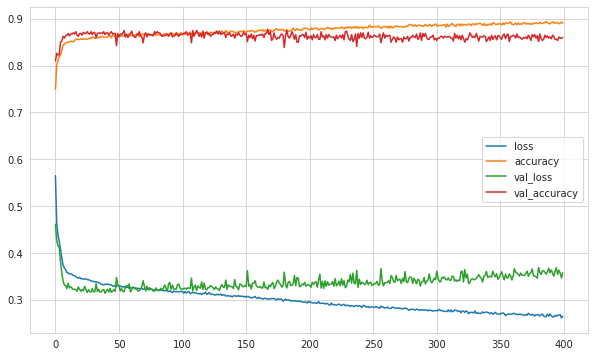

In [61]:
loss_df.plot();

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [62]:
model.evaluate(X_test, y_test, verbose=0)

[0.44790956377983093, 0.840499997138977]

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.44790956377983093
accuracy :  0.840499997138977


In [64]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 5ms/step
[[1489  104]
 [ 215  192]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.65      0.47      0.55       407

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [76]:
from tensorflow.keras.optimizers import Adam

In [77]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)#default degeri 0.001 ben arttirdim, stepsize= slope*LR adim sayim artti, hizli ogrenecek.
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [78]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)
#patience 15 sefer sonuc degismiyorsa azaliyorsa yukselmiyorsa dur. 
#restore_best_weights = True, en son degeri alma en iyi degeri al. cunku en son deger azalan olabilir.

In [79]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 2s 6ms/step - loss: 0.4806 - accuracy: 0.7924 - val_loss: 0.4284 - val_accuracy: 0.8100
Epoch 2/1000
225/225 [==============================] - 3s 12ms/step - loss: 0.4250 - accuracy: 0.8032 - val_loss: 0.3786 - val_accuracy: 0.8487
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3973 - accuracy: 0.8353 - val_loss: 0.3549 - val_accuracy: 0.8662
Epoch 4/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3847 - accuracy: 0.8440 - val_loss: 0.3562 - val_accuracy: 0.8637
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3729 - accuracy: 0.8493 - val_loss: 0.3552 - val_accuracy: 0.8637
Epoch 6/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3676 - accuracy: 0.8531 - val_loss: 0.3562 - val_accuracy: 0.8537
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8556 - val_loss: 0.3220 - val_accuracy

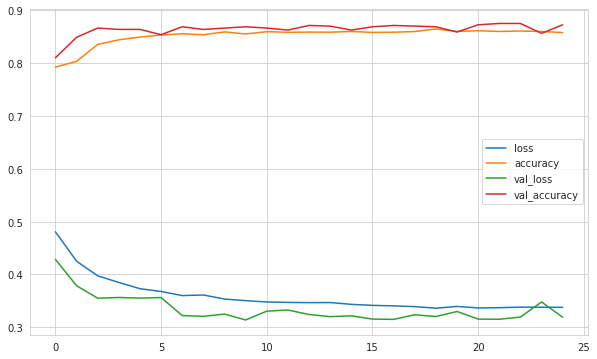

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34495195746421814
accuracy :  0.859499990940094


In [82]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1549   44]
 [ 237  170]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout
#overfit' engellemek icin bazi noronlari donduruyorum.

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Early Stop

#### Monitor the "val_loss" as metric

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Monitor the "val_recall" as metric

In [67]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [68]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.5243 - accuracy: 0.7879

225/225 [==============================] - 1s 3ms/step - loss: 0.5209 - accuracy: 0.7890 - val_loss: 0.4590 - val_accuracy: 0.8100
Epoch 2/1000
221/225 [============================>.] - ETA: 0s - loss: 0.4640 - accuracy: 0.7957

225/225 [==============================] - 1s 2ms/step - loss: 0.4640 - accuracy: 0.7953 - val_loss: 0.4319 - val_accuracy: 0.8138
Epoch 3/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.4394 - accuracy: 0.8096

225/225 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.8097 - val_loss: 0.4113 - val_accuracy: 0.8250
Epoch 4/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.4214 - accuracy: 0.8199

225/225 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8215 - val_loss: 0.4025 - val_accuracy: 0.8338
Epoch 5/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.4047 - accuracy: 0.8260

225/225 [==============================] - 1s 3ms/step - loss: 0.4036 - accuracy: 0.8267 - val_loss: 0.3783 - val_accuracy: 0.8550
Epoch 6/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3917 - accuracy: 0.8334

225/225 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8336 - val_loss: 0.3580 - val_accuracy: 0.8637
Epoch 7/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3771 - accuracy: 0.8448

225/225 [==============================] - 1s 3ms/step - loss: 0.3777 - accuracy: 0.8443 - val_loss: 0.3439 - val_accuracy: 0.8587
Epoch 8/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3718 - accuracy: 0.8460

225/225 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8471 - val_loss: 0.3366 - val_accuracy: 0.8612
Epoch 9/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3677 - accuracy: 0.8484

225/225 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8500 - val_loss: 0.3351 - val_accuracy: 0.8675
Epoch 10/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8514

225/225 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8507 - val_loss: 0.3270 - val_accuracy: 0.8625
Epoch 11/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3547 - accuracy: 0.8538

225/225 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8543 - val_loss: 0.3319 - val_accuracy: 0.8637
Epoch 12/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3567 - accuracy: 0.8503

225/225 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8535 - val_loss: 0.3248 - val_accuracy: 0.8625
Epoch 13/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3528 - accuracy: 0.8536

225/225 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8531 - val_loss: 0.3268 - val_accuracy: 0.8612
Epoch 14/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3515 - accuracy: 0.8553

225/225 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8554 - val_loss: 0.3267 - val_accuracy: 0.8587
Epoch 15/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3521 - accuracy: 0.8514

225/225 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8535 - val_loss: 0.3231 - val_accuracy: 0.8637
Epoch 16/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3469 - accuracy: 0.8556

225/225 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8557 - val_loss: 0.3207 - val_accuracy: 0.8650
Epoch 17/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3453 - accuracy: 0.8587

225/225 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.8590 - val_loss: 0.3188 - val_accuracy: 0.8650
Epoch 18/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3464 - accuracy: 0.8569

225/225 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8574 - val_loss: 0.3194 - val_accuracy: 0.8625
Epoch 19/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3381 - accuracy: 0.8592

225/225 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8564 - val_loss: 0.3230 - val_accuracy: 0.8650
Epoch 20/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3454 - accuracy: 0.8585

225/225 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8578 - val_loss: 0.3267 - val_accuracy: 0.8600
Epoch 21/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3417 - accuracy: 0.8575

225/225 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8575 - val_loss: 0.3156 - val_accuracy: 0.8687
Epoch 22/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3426 - accuracy: 0.8574

225/225 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8574 - val_loss: 0.3195 - val_accuracy: 0.8612
Epoch 23/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3412 - accuracy: 0.8597

225/225 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8593 - val_loss: 0.3193 - val_accuracy: 0.8600
Epoch 24/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3435 - accuracy: 0.8570

225/225 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8582 - val_loss: 0.3231 - val_accuracy: 0.8612
Epoch 25/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3409 - accuracy: 0.8567

225/225 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8578 - val_loss: 0.3158 - val_accuracy: 0.8650
Epoch 26/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3398 - accuracy: 0.8583

225/225 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8586 - val_loss: 0.3157 - val_accuracy: 0.8662
Epoch 27/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3398 - accuracy: 0.8575

225/225 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8582 - val_loss: 0.3149 - val_accuracy: 0.8675
Epoch 28/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3398 - accuracy: 0.8586

225/225 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8590 - val_loss: 0.3191 - val_accuracy: 0.8650
Epoch 29/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3359 - accuracy: 0.8613

225/225 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8596 - val_loss: 0.3154 - val_accuracy: 0.8650
Epoch 30/1000
201/225 [=========================>....] - ETA: 0s - loss: 0.3397 - accuracy: 0.8633

225/225 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8633 - val_loss: 0.3205 - val_accuracy: 0.8612
Epoch 31/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3359 - accuracy: 0.8585

225/225 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8586 - val_loss: 0.3136 - val_accuracy: 0.8675
Epoch 32/1000
225/225 [==============================] - ETA: 0s - loss: 0.3377 - accuracy: 0.8596

225/225 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8596 - val_loss: 0.3189 - val_accuracy: 0.8637
Epoch 33/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3363 - accuracy: 0.8596

225/225 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8587 - val_loss: 0.3170 - val_accuracy: 0.8675
Epoch 34/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3372 - accuracy: 0.8616

225/225 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8611 - val_loss: 0.3161 - val_accuracy: 0.8637
Epoch 35/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3369 - accuracy: 0.8594

225/225 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8601 - val_loss: 0.3155 - val_accuracy: 0.8625
Epoch 36/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3337 - accuracy: 0.8622

225/225 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8619 - val_loss: 0.3110 - val_accuracy: 0.8687
Epoch 37/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3352 - accuracy: 0.8587

225/225 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8589 - val_loss: 0.3133 - val_accuracy: 0.8662
Epoch 38/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3347 - accuracy: 0.8601

225/225 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8603 - val_loss: 0.3154 - val_accuracy: 0.8662
Epoch 39/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3332 - accuracy: 0.8623

225/225 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8632 - val_loss: 0.3105 - val_accuracy: 0.8650
Epoch 40/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3320 - accuracy: 0.8621

225/225 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8607 - val_loss: 0.3134 - val_accuracy: 0.8637
Epoch 41/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3345 - accuracy: 0.8613

225/225 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8628 - val_loss: 0.3111 - val_accuracy: 0.8675
Epoch 42/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3335 - accuracy: 0.8594

225/225 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8597 - val_loss: 0.3165 - val_accuracy: 0.8662
Epoch 43/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3317 - accuracy: 0.8638

225/225 [==============================] - 1s 3ms/step - loss: 0.3328 - accuracy: 0.8633 - val_loss: 0.3098 - val_accuracy: 0.8712
Epoch 44/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3327 - accuracy: 0.8640

225/225 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8640 - val_loss: 0.3164 - val_accuracy: 0.8650
Epoch 45/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3327 - accuracy: 0.8600

225/225 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8604 - val_loss: 0.3129 - val_accuracy: 0.8687
Epoch 46/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3290 - accuracy: 0.8654

225/225 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8649 - val_loss: 0.3154 - val_accuracy: 0.8662
Epoch 47/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3301 - accuracy: 0.8644

225/225 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8643 - val_loss: 0.3136 - val_accuracy: 0.8625
Epoch 48/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3305 - accuracy: 0.8635

225/225 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8637 - val_loss: 0.3103 - val_accuracy: 0.8700
Epoch 49/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3269 - accuracy: 0.8640

225/225 [==============================] - 1s 3ms/step - loss: 0.3278 - accuracy: 0.8640 - val_loss: 0.3364 - val_accuracy: 0.8512
Epoch 50/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3291 - accuracy: 0.8643

225/225 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8635 - val_loss: 0.3215 - val_accuracy: 0.8662
Epoch 51/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3270 - accuracy: 0.8640

225/225 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8637 - val_loss: 0.3224 - val_accuracy: 0.8600
Epoch 52/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3322 - accuracy: 0.8621

225/225 [==============================] - 1s 5ms/step - loss: 0.3300 - accuracy: 0.8633 - val_loss: 0.3131 - val_accuracy: 0.8662
Epoch 53/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3249 - accuracy: 0.8647

225/225 [==============================] - 1s 5ms/step - loss: 0.3285 - accuracy: 0.8629 - val_loss: 0.3148 - val_accuracy: 0.8687
Epoch 54/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.3274 - accuracy: 0.8618

225/225 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8615 - val_loss: 0.3097 - val_accuracy: 0.8637
Epoch 55/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3281 - accuracy: 0.8633

225/225 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8632 - val_loss: 0.3140 - val_accuracy: 0.8675
Epoch 56/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3265 - accuracy: 0.8652

225/225 [==============================] - 1s 3ms/step - loss: 0.3270 - accuracy: 0.8640 - val_loss: 0.3205 - val_accuracy: 0.8700
Epoch 57/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3268 - accuracy: 0.8645

225/225 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8640 - val_loss: 0.3220 - val_accuracy: 0.8650
Epoch 58/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3269 - accuracy: 0.8629

225/225 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8628 - val_loss: 0.3235 - val_accuracy: 0.8662
Epoch 59/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3255 - accuracy: 0.8654

225/225 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8650 - val_loss: 0.3266 - val_accuracy: 0.8662
Epoch 60/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3248 - accuracy: 0.8668

225/225 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8665 - val_loss: 0.3118 - val_accuracy: 0.8662
Epoch 61/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3260 - accuracy: 0.8653

225/225 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8646 - val_loss: 0.3160 - val_accuracy: 0.8625
Epoch 62/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3268 - accuracy: 0.8659

225/225 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8665 - val_loss: 0.3157 - val_accuracy: 0.8662
Epoch 63/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3267 - accuracy: 0.8612

225/225 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8614 - val_loss: 0.3121 - val_accuracy: 0.8687
Epoch 64/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3260 - accuracy: 0.8639

225/225 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8637 - val_loss: 0.3147 - val_accuracy: 0.8687
Epoch 65/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3216 - accuracy: 0.8679

225/225 [==============================] - 1s 2ms/step - loss: 0.3252 - accuracy: 0.8664 - val_loss: 0.3148 - val_accuracy: 0.8687
Epoch 66/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3244 - accuracy: 0.8670

225/225 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8667 - val_loss: 0.3167 - val_accuracy: 0.8662
Epoch 67/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3225 - accuracy: 0.8664

225/225 [==============================] - 1s 5ms/step - loss: 0.3256 - accuracy: 0.8651 - val_loss: 0.3106 - val_accuracy: 0.8687
Epoch 68/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3230 - accuracy: 0.8672

225/225 [==============================] - 2s 7ms/step - loss: 0.3247 - accuracy: 0.8660 - val_loss: 0.3159 - val_accuracy: 0.8712
Epoch 69/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3248 - accuracy: 0.8641

225/225 [==============================] - 1s 6ms/step - loss: 0.3250 - accuracy: 0.8642 - val_loss: 0.3154 - val_accuracy: 0.8675
Epoch 70/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3241 - accuracy: 0.8663

225/225 [==============================] - 1s 5ms/step - loss: 0.3240 - accuracy: 0.8661 - val_loss: 0.3219 - val_accuracy: 0.8612
Epoch 71/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3242 - accuracy: 0.8650

225/225 [==============================] - 1s 4ms/step - loss: 0.3240 - accuracy: 0.8650 - val_loss: 0.3228 - val_accuracy: 0.8650
Epoch 72/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3245 - accuracy: 0.8664

225/225 [==============================] - 1s 3ms/step - loss: 0.3246 - accuracy: 0.8667 - val_loss: 0.3111 - val_accuracy: 0.8687
Epoch 73/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3230 - accuracy: 0.8674

225/225 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8668 - val_loss: 0.3154 - val_accuracy: 0.8687
Epoch 74/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3238 - accuracy: 0.8690

225/225 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8693 - val_loss: 0.3188 - val_accuracy: 0.8650
Epoch 75/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3225 - accuracy: 0.8674

225/225 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8672 - val_loss: 0.3147 - val_accuracy: 0.8687
Epoch 76/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3224 - accuracy: 0.8677

225/225 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8668 - val_loss: 0.3140 - val_accuracy: 0.8650
Epoch 77/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3232 - accuracy: 0.8666

225/225 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8668 - val_loss: 0.3187 - val_accuracy: 0.8700
Epoch 78/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3231 - accuracy: 0.8660

225/225 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8662 - val_loss: 0.3135 - val_accuracy: 0.8675
Epoch 79/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3231 - accuracy: 0.8643

225/225 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.8651 - val_loss: 0.3140 - val_accuracy: 0.8625
Epoch 80/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3236 - accuracy: 0.8620

225/225 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8629 - val_loss: 0.3156 - val_accuracy: 0.8662
Epoch 81/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3228 - accuracy: 0.8675

225/225 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8672 - val_loss: 0.3179 - val_accuracy: 0.8662
Epoch 82/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3222 - accuracy: 0.8661

225/225 [==============================] - 1s 5ms/step - loss: 0.3210 - accuracy: 0.8669 - val_loss: 0.3189 - val_accuracy: 0.8675
Epoch 83/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3226 - accuracy: 0.8660

225/225 [==============================] - 1s 4ms/step - loss: 0.3221 - accuracy: 0.8661 - val_loss: 0.3142 - val_accuracy: 0.8662
Epoch 84/1000
225/225 [==============================] - ETA: 0s - loss: 0.3227 - accuracy: 0.8653

225/225 [==============================] - 1s 5ms/step - loss: 0.3227 - accuracy: 0.8653 - val_loss: 0.3171 - val_accuracy: 0.8675
Epoch 85/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3235 - accuracy: 0.8658

225/225 [==============================] - 1s 3ms/step - loss: 0.3221 - accuracy: 0.8661 - val_loss: 0.3157 - val_accuracy: 0.8687
Epoch 86/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3226 - accuracy: 0.8647

225/225 [==============================] - 1s 3ms/step - loss: 0.3213 - accuracy: 0.8651 - val_loss: 0.3154 - val_accuracy: 0.8637
Epoch 87/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3215 - accuracy: 0.8680

225/225 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.8682 - val_loss: 0.3190 - val_accuracy: 0.8637
Epoch 88/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3197 - accuracy: 0.8677

225/225 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8675 - val_loss: 0.3161 - val_accuracy: 0.8725
Epoch 89/1000
225/225 [==============================] - ETA: 0s - loss: 0.3222 - accuracy: 0.8643

225/225 [==============================] - 1s 3ms/step - loss: 0.3222 - accuracy: 0.8643 - val_loss: 0.3154 - val_accuracy: 0.8662
Epoch 90/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3189 - accuracy: 0.8677

225/225 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.8671 - val_loss: 0.3239 - val_accuracy: 0.8600
Epoch 91/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3210 - accuracy: 0.8664

225/225 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8662 - val_loss: 0.3267 - val_accuracy: 0.8587
Epoch 92/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3193 - accuracy: 0.8665

225/225 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8667 - val_loss: 0.3211 - val_accuracy: 0.8700
Epoch 93/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.3219 - accuracy: 0.8671

225/225 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.8687 - val_loss: 0.3178 - val_accuracy: 0.8662
Epoch 94/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3202 - accuracy: 0.8675

225/225 [==============================] - 1s 3ms/step - loss: 0.3198 - accuracy: 0.8678 - val_loss: 0.3150 - val_accuracy: 0.8637
Epoch 95/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3197 - accuracy: 0.8680

225/225 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8672 - val_loss: 0.3261 - val_accuracy: 0.8550
Epoch 96/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3214 - accuracy: 0.8667

225/225 [==============================] - 1s 4ms/step - loss: 0.3205 - accuracy: 0.8672 - val_loss: 0.3163 - val_accuracy: 0.8650
Epoch 97/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3214 - accuracy: 0.8643

225/225 [==============================] - 1s 4ms/step - loss: 0.3199 - accuracy: 0.8644 - val_loss: 0.3178 - val_accuracy: 0.8662
Epoch 98/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3184 - accuracy: 0.8670

225/225 [==============================] - 1s 4ms/step - loss: 0.3182 - accuracy: 0.8662 - val_loss: 0.3206 - val_accuracy: 0.8637
Epoch 99/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3212 - accuracy: 0.8662

225/225 [==============================] - 1s 4ms/step - loss: 0.3202 - accuracy: 0.8665 - val_loss: 0.3196 - val_accuracy: 0.8687
Epoch 100/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3204 - accuracy: 0.8659

225/225 [==============================] - 1s 5ms/step - loss: 0.3200 - accuracy: 0.8653 - val_loss: 0.3201 - val_accuracy: 0.8687
Epoch 101/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3191 - accuracy: 0.8674

225/225 [==============================] - 1s 2ms/step - loss: 0.3198 - accuracy: 0.8669 - val_loss: 0.3162 - val_accuracy: 0.8650
Epoch 102/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3198 - accuracy: 0.8686

225/225 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8692 - val_loss: 0.3151 - val_accuracy: 0.8675
Epoch 103/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3204 - accuracy: 0.8646

225/225 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.8650 - val_loss: 0.3225 - val_accuracy: 0.8637
Epoch 104/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3193 - accuracy: 0.8664

225/225 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8674 - val_loss: 0.3185 - val_accuracy: 0.8650
Epoch 105/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3192 - accuracy: 0.8667

225/225 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8671 - val_loss: 0.3170 - val_accuracy: 0.8700
Epoch 106/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3205 - accuracy: 0.8679

225/225 [==============================] - 1s 2ms/step - loss: 0.3195 - accuracy: 0.8685 - val_loss: 0.3166 - val_accuracy: 0.8650
Epoch 107/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3160 - accuracy: 0.8684

225/225 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.8686 - val_loss: 0.3199 - val_accuracy: 0.8625
Epoch 108/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3150 - accuracy: 0.8707

225/225 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8685 - val_loss: 0.3295 - val_accuracy: 0.8562
Epoch 109/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3201 - accuracy: 0.8693

225/225 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8701 - val_loss: 0.3175 - val_accuracy: 0.8700
Epoch 110/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3170 - accuracy: 0.8686

225/225 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.8686 - val_loss: 0.3223 - val_accuracy: 0.8662
Epoch 111/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3170 - accuracy: 0.8687

225/225 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.8681 - val_loss: 0.3253 - val_accuracy: 0.8625
Epoch 112/1000
225/225 [==============================] - ETA: 0s - loss: 0.3169 - accuracy: 0.8689

225/225 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.8689 - val_loss: 0.3204 - val_accuracy: 0.8662
Epoch 113/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3148 - accuracy: 0.8700

225/225 [==============================] - 1s 3ms/step - loss: 0.3170 - accuracy: 0.8693 - val_loss: 0.3195 - val_accuracy: 0.8675
Epoch 114/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3169 - accuracy: 0.8688

225/225 [==============================] - 1s 3ms/step - loss: 0.3162 - accuracy: 0.8696 - val_loss: 0.3183 - val_accuracy: 0.8712
Epoch 115/1000
225/225 [==============================] - ETA: 0s - loss: 0.3158 - accuracy: 0.8674

225/225 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.8674 - val_loss: 0.3173 - val_accuracy: 0.8662
Epoch 116/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3161 - accuracy: 0.8680

225/225 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.8685 - val_loss: 0.3219 - val_accuracy: 0.8650
Epoch 117/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3178 - accuracy: 0.8685

225/225 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8689 - val_loss: 0.3213 - val_accuracy: 0.8700
Epoch 118/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3143 - accuracy: 0.8663

225/225 [==============================] - 1s 3ms/step - loss: 0.3151 - accuracy: 0.8662 - val_loss: 0.3295 - val_accuracy: 0.8662
Epoch 119/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.3144 - accuracy: 0.8695

225/225 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8681 - val_loss: 0.3205 - val_accuracy: 0.8637
Epoch 120/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3148 - accuracy: 0.8691

225/225 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.8689 - val_loss: 0.3221 - val_accuracy: 0.8687
Epoch 121/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3171 - accuracy: 0.8672

225/225 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.8672 - val_loss: 0.3229 - val_accuracy: 0.8637
Epoch 122/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3165 - accuracy: 0.8637

225/225 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.8644 - val_loss: 0.3218 - val_accuracy: 0.8650
Epoch 123/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3160 - accuracy: 0.8696

225/225 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8694 - val_loss: 0.3210 - val_accuracy: 0.8712
Epoch 124/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3166 - accuracy: 0.8685

225/225 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.8696 - val_loss: 0.3246 - val_accuracy: 0.8650
Epoch 125/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3117 - accuracy: 0.8703

225/225 [==============================] - 1s 2ms/step - loss: 0.3142 - accuracy: 0.8690 - val_loss: 0.3255 - val_accuracy: 0.8637
Epoch 126/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3128 - accuracy: 0.8700

225/225 [==============================] - 1s 3ms/step - loss: 0.3137 - accuracy: 0.8701 - val_loss: 0.3220 - val_accuracy: 0.8662
Epoch 127/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3136 - accuracy: 0.8708

225/225 [==============================] - 1s 4ms/step - loss: 0.3134 - accuracy: 0.8707 - val_loss: 0.3248 - val_accuracy: 0.8675
Epoch 128/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8666

225/225 [==============================] - 1s 4ms/step - loss: 0.3145 - accuracy: 0.8668 - val_loss: 0.3218 - val_accuracy: 0.8712
Epoch 129/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.8710

225/225 [==============================] - 1s 3ms/step - loss: 0.3126 - accuracy: 0.8708 - val_loss: 0.3234 - val_accuracy: 0.8662
Epoch 130/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3135 - accuracy: 0.8713

225/225 [==============================] - 1s 3ms/step - loss: 0.3135 - accuracy: 0.8708 - val_loss: 0.3193 - val_accuracy: 0.8650
Epoch 131/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3172 - accuracy: 0.8680

225/225 [==============================] - 1s 3ms/step - loss: 0.3143 - accuracy: 0.8689 - val_loss: 0.3197 - val_accuracy: 0.8612
Epoch 132/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3143 - accuracy: 0.8672

225/225 [==============================] - 1s 4ms/step - loss: 0.3132 - accuracy: 0.8676 - val_loss: 0.3326 - val_accuracy: 0.8650
Epoch 133/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3131 - accuracy: 0.8718

225/225 [==============================] - 1s 3ms/step - loss: 0.3148 - accuracy: 0.8712 - val_loss: 0.3219 - val_accuracy: 0.8675
Epoch 134/1000
223/225 [============================>.] - ETA: 0s - loss: 0.3131 - accuracy: 0.8705

225/225 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8707 - val_loss: 0.3206 - val_accuracy: 0.8725
Epoch 135/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8704

225/225 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8696 - val_loss: 0.3265 - val_accuracy: 0.8662
Epoch 136/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3105 - accuracy: 0.8710

225/225 [==============================] - 1s 3ms/step - loss: 0.3113 - accuracy: 0.8704 - val_loss: 0.3174 - val_accuracy: 0.8650
Epoch 137/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3111 - accuracy: 0.8662

225/225 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.8668 - val_loss: 0.3273 - val_accuracy: 0.8625
Epoch 138/1000
225/225 [==============================] - ETA: 0s - loss: 0.3112 - accuracy: 0.8696

225/225 [==============================] - 1s 3ms/step - loss: 0.3112 - accuracy: 0.8696 - val_loss: 0.3247 - val_accuracy: 0.8600
Epoch 139/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.8684

225/225 [==============================] - 1s 3ms/step - loss: 0.3118 - accuracy: 0.8687 - val_loss: 0.3218 - val_accuracy: 0.8625
Epoch 140/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3106 - accuracy: 0.8682

225/225 [==============================] - 1s 3ms/step - loss: 0.3100 - accuracy: 0.8699 - val_loss: 0.3254 - val_accuracy: 0.8650
Epoch 141/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3129 - accuracy: 0.8721

225/225 [==============================] - 1s 3ms/step - loss: 0.3108 - accuracy: 0.8733 - val_loss: 0.3270 - val_accuracy: 0.8637
Epoch 142/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3102 - accuracy: 0.8705

225/225 [==============================] - 1s 3ms/step - loss: 0.3108 - accuracy: 0.8703 - val_loss: 0.3263 - val_accuracy: 0.8612
Epoch 143/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3135 - accuracy: 0.8692

225/225 [==============================] - 1s 3ms/step - loss: 0.3118 - accuracy: 0.8704 - val_loss: 0.3240 - val_accuracy: 0.8600
Epoch 144/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3086 - accuracy: 0.8722

225/225 [==============================] - 1s 3ms/step - loss: 0.3101 - accuracy: 0.8712 - val_loss: 0.3235 - val_accuracy: 0.8625
Epoch 145/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3097 - accuracy: 0.8703

225/225 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.8700 - val_loss: 0.3223 - val_accuracy: 0.8675
Epoch 146/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3091 - accuracy: 0.8713

225/225 [==============================] - 1s 3ms/step - loss: 0.3104 - accuracy: 0.8710 - val_loss: 0.3268 - val_accuracy: 0.8662
Epoch 147/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3096 - accuracy: 0.8683

225/225 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8682 - val_loss: 0.3250 - val_accuracy: 0.8637
Epoch 148/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.3119 - accuracy: 0.8701

225/225 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8704 - val_loss: 0.3236 - val_accuracy: 0.8625
Epoch 149/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3104 - accuracy: 0.8674

225/225 [==============================] - 1s 3ms/step - loss: 0.3091 - accuracy: 0.8686 - val_loss: 0.3215 - val_accuracy: 0.8662
Epoch 150/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3114 - accuracy: 0.8707

225/225 [==============================] - 1s 3ms/step - loss: 0.3104 - accuracy: 0.8707 - val_loss: 0.3222 - val_accuracy: 0.8675
Epoch 151/1000
225/225 [==============================] - ETA: 0s - loss: 0.3083 - accuracy: 0.8707

225/225 [==============================] - 1s 5ms/step - loss: 0.3083 - accuracy: 0.8707 - val_loss: 0.3211 - val_accuracy: 0.8675
Epoch 152/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3090 - accuracy: 0.8727

225/225 [==============================] - 1s 4ms/step - loss: 0.3096 - accuracy: 0.8722 - val_loss: 0.3358 - val_accuracy: 0.8612
Epoch 153/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3080 - accuracy: 0.8720

225/225 [==============================] - 2s 9ms/step - loss: 0.3087 - accuracy: 0.8712 - val_loss: 0.3226 - val_accuracy: 0.8625
Epoch 154/1000
224/225 [============================>.] - ETA: 0s - loss: 0.3081 - accuracy: 0.8691

225/225 [==============================] - 2s 7ms/step - loss: 0.3074 - accuracy: 0.8694 - val_loss: 0.3222 - val_accuracy: 0.8637
Epoch 155/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3096 - accuracy: 0.8705

225/225 [==============================] - 1s 4ms/step - loss: 0.3076 - accuracy: 0.8718 - val_loss: 0.3280 - val_accuracy: 0.8637
Epoch 156/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3085 - accuracy: 0.8699

225/225 [==============================] - 1s 5ms/step - loss: 0.3079 - accuracy: 0.8699 - val_loss: 0.3201 - val_accuracy: 0.8687
Epoch 157/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3034 - accuracy: 0.8711

225/225 [==============================] - 1s 3ms/step - loss: 0.3070 - accuracy: 0.8693 - val_loss: 0.3255 - val_accuracy: 0.8587
Epoch 158/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3093 - accuracy: 0.8688

225/225 [==============================] - 1s 3ms/step - loss: 0.3091 - accuracy: 0.8687 - val_loss: 0.3246 - val_accuracy: 0.8550
Epoch 159/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.3051 - accuracy: 0.8736

225/225 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.8726 - val_loss: 0.3274 - val_accuracy: 0.8612
Epoch 160/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3085 - accuracy: 0.8711

225/225 [==============================] - 1s 2ms/step - loss: 0.3074 - accuracy: 0.8724 - val_loss: 0.3288 - val_accuracy: 0.8650
Epoch 161/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.3086 - accuracy: 0.8709

225/225 [==============================] - 1s 2ms/step - loss: 0.3082 - accuracy: 0.8710 - val_loss: 0.3205 - val_accuracy: 0.8625
Epoch 162/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3057 - accuracy: 0.8747

225/225 [==============================] - 1s 2ms/step - loss: 0.3062 - accuracy: 0.8740 - val_loss: 0.3268 - val_accuracy: 0.8625
Epoch 163/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3099 - accuracy: 0.8695

225/225 [==============================] - 1s 3ms/step - loss: 0.3065 - accuracy: 0.8717 - val_loss: 0.3247 - val_accuracy: 0.8687
Epoch 164/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3051 - accuracy: 0.8743

225/225 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8736 - val_loss: 0.3208 - val_accuracy: 0.8650
Epoch 165/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3042 - accuracy: 0.8719

225/225 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.8708 - val_loss: 0.3323 - val_accuracy: 0.8612
Epoch 166/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.3052 - accuracy: 0.8754

225/225 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.8761 - val_loss: 0.3237 - val_accuracy: 0.8675
Epoch 167/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3066 - accuracy: 0.8705

225/225 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.8710 - val_loss: 0.3243 - val_accuracy: 0.8612
Epoch 168/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.3044 - accuracy: 0.8745

225/225 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8753 - val_loss: 0.3261 - val_accuracy: 0.8675
Epoch 169/1000
200/225 [=========================>....] - ETA: 0s - loss: 0.3084 - accuracy: 0.8698

225/225 [==============================] - 1s 2ms/step - loss: 0.3055 - accuracy: 0.8722 - val_loss: 0.3230 - val_accuracy: 0.8625
Epoch 170/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3084 - accuracy: 0.8705

225/225 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 0.8712 - val_loss: 0.3240 - val_accuracy: 0.8650
Epoch 171/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3042 - accuracy: 0.8726

225/225 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.8718 - val_loss: 0.3261 - val_accuracy: 0.8637
Epoch 172/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3052 - accuracy: 0.8706

225/225 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.8711 - val_loss: 0.3251 - val_accuracy: 0.8637
Epoch 173/1000
225/225 [==============================] - ETA: 0s - loss: 0.3050 - accuracy: 0.8719

225/225 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8719 - val_loss: 0.3264 - val_accuracy: 0.8687
Epoch 174/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3036 - accuracy: 0.8736

225/225 [==============================] - 1s 3ms/step - loss: 0.3039 - accuracy: 0.8731 - val_loss: 0.3220 - val_accuracy: 0.8637
Epoch 175/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.3037 - accuracy: 0.8728

225/225 [==============================] - 1s 3ms/step - loss: 0.3032 - accuracy: 0.8735 - val_loss: 0.3327 - val_accuracy: 0.8575
Epoch 176/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3066 - accuracy: 0.8729

225/225 [==============================] - 1s 3ms/step - loss: 0.3056 - accuracy: 0.8742 - val_loss: 0.3293 - val_accuracy: 0.8637
Epoch 177/1000
200/225 [=========================>....] - ETA: 0s - loss: 0.3034 - accuracy: 0.8722

225/225 [==============================] - 1s 2ms/step - loss: 0.3029 - accuracy: 0.8729 - val_loss: 0.3255 - val_accuracy: 0.8637
Epoch 178/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2997 - accuracy: 0.8728

225/225 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.8721 - val_loss: 0.3231 - val_accuracy: 0.8625
Epoch 179/1000
222/225 [============================>.] - ETA: 0s - loss: 0.3049 - accuracy: 0.8754

225/225 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8756 - val_loss: 0.3251 - val_accuracy: 0.8662
Epoch 180/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3001 - accuracy: 0.8743

225/225 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8733 - val_loss: 0.3250 - val_accuracy: 0.8712
Epoch 181/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.3001 - accuracy: 0.8769

225/225 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.8763 - val_loss: 0.3476 - val_accuracy: 0.8487
Epoch 182/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3071 - accuracy: 0.8714

225/225 [==============================] - 1s 4ms/step - loss: 0.3069 - accuracy: 0.8719 - val_loss: 0.3298 - val_accuracy: 0.8637
Epoch 183/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3019 - accuracy: 0.8713

225/225 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.8717 - val_loss: 0.3243 - val_accuracy: 0.8650
Epoch 184/1000
221/225 [============================>.] - ETA: 0s - loss: 0.3010 - accuracy: 0.8747

225/225 [==============================] - 1s 5ms/step - loss: 0.3016 - accuracy: 0.8746 - val_loss: 0.3303 - val_accuracy: 0.8612
Epoch 185/1000
219/225 [============================>.] - ETA: 0s - loss: 0.3023 - accuracy: 0.8717

225/225 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.8719 - val_loss: 0.3297 - val_accuracy: 0.8675
Epoch 186/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3019 - accuracy: 0.8754

225/225 [==============================] - 1s 3ms/step - loss: 0.3000 - accuracy: 0.8763 - val_loss: 0.3271 - val_accuracy: 0.8650
Epoch 187/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.3030 - accuracy: 0.8716

225/225 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8708 - val_loss: 0.3271 - val_accuracy: 0.8700
Epoch 188/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3026 - accuracy: 0.8701

225/225 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.8717 - val_loss: 0.3328 - val_accuracy: 0.8600
Epoch 189/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.3016 - accuracy: 0.8737

225/225 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.8733 - val_loss: 0.3352 - val_accuracy: 0.8550
Epoch 190/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.3044 - accuracy: 0.8727

225/225 [==============================] - 1s 2ms/step - loss: 0.3023 - accuracy: 0.8743 - val_loss: 0.3254 - val_accuracy: 0.8650
Epoch 191/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2952 - accuracy: 0.8762

225/225 [==============================] - 1s 3ms/step - loss: 0.3007 - accuracy: 0.8733 - val_loss: 0.3362 - val_accuracy: 0.8612
Epoch 192/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2992 - accuracy: 0.8747

225/225 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.8743 - val_loss: 0.3373 - val_accuracy: 0.8637
Epoch 193/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.3023 - accuracy: 0.8746

225/225 [==============================] - 1s 2ms/step - loss: 0.3008 - accuracy: 0.8747 - val_loss: 0.3279 - val_accuracy: 0.8612
Epoch 194/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.3021 - accuracy: 0.8747

225/225 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.8739 - val_loss: 0.3271 - val_accuracy: 0.8587
Epoch 195/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.3009 - accuracy: 0.8758

225/225 [==============================] - 1s 3ms/step - loss: 0.2982 - accuracy: 0.8772 - val_loss: 0.3294 - val_accuracy: 0.8662
Epoch 196/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2992 - accuracy: 0.8736

225/225 [==============================] - 1s 3ms/step - loss: 0.3001 - accuracy: 0.8736 - val_loss: 0.3273 - val_accuracy: 0.8612
Epoch 197/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2972 - accuracy: 0.8757

225/225 [==============================] - 1s 5ms/step - loss: 0.2988 - accuracy: 0.8740 - val_loss: 0.3286 - val_accuracy: 0.8587
Epoch 198/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2994 - accuracy: 0.8761

225/225 [==============================] - 1s 5ms/step - loss: 0.2981 - accuracy: 0.8768 - val_loss: 0.3298 - val_accuracy: 0.8675
Epoch 199/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2972 - accuracy: 0.8754

225/225 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.8746 - val_loss: 0.3254 - val_accuracy: 0.8650
Epoch 200/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8760

225/225 [==============================] - 1s 3ms/step - loss: 0.3000 - accuracy: 0.8750 - val_loss: 0.3271 - val_accuracy: 0.8600
Epoch 201/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2981 - accuracy: 0.8764

225/225 [==============================] - 1s 3ms/step - loss: 0.3006 - accuracy: 0.8743 - val_loss: 0.3286 - val_accuracy: 0.8637
Epoch 202/1000
220/225 [============================>.] - ETA: 0s - loss: 0.3005 - accuracy: 0.8746

225/225 [==============================] - 1s 5ms/step - loss: 0.2999 - accuracy: 0.8749 - val_loss: 0.3335 - val_accuracy: 0.8562
Epoch 203/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2944 - accuracy: 0.8776

225/225 [==============================] - 1s 3ms/step - loss: 0.2975 - accuracy: 0.8760 - val_loss: 0.3301 - val_accuracy: 0.8587
Epoch 204/1000
218/225 [============================>.] - ETA: 0s - loss: 0.3001 - accuracy: 0.8770

225/225 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8779 - val_loss: 0.3335 - val_accuracy: 0.8662
Epoch 205/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2967 - accuracy: 0.8750

225/225 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.8746 - val_loss: 0.3321 - val_accuracy: 0.8612
Epoch 206/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2971 - accuracy: 0.8768

225/225 [==============================] - 1s 3ms/step - loss: 0.2970 - accuracy: 0.8769 - val_loss: 0.3421 - val_accuracy: 0.8637
Epoch 207/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2976 - accuracy: 0.8768

225/225 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.8767 - val_loss: 0.3274 - val_accuracy: 0.8675
Epoch 208/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.8758

225/225 [==============================] - 1s 3ms/step - loss: 0.2981 - accuracy: 0.8765 - val_loss: 0.3289 - val_accuracy: 0.8662
Epoch 209/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2954 - accuracy: 0.8770

225/225 [==============================] - 1s 3ms/step - loss: 0.2971 - accuracy: 0.8757 - val_loss: 0.3438 - val_accuracy: 0.8525
Epoch 210/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2985 - accuracy: 0.8764

225/225 [==============================] - 1s 3ms/step - loss: 0.2993 - accuracy: 0.8765 - val_loss: 0.3273 - val_accuracy: 0.8637
Epoch 211/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2969 - accuracy: 0.8766

225/225 [==============================] - 1s 4ms/step - loss: 0.2977 - accuracy: 0.8763 - val_loss: 0.3420 - val_accuracy: 0.8537
Epoch 212/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.8763

225/225 [==============================] - 1s 5ms/step - loss: 0.2987 - accuracy: 0.8761 - val_loss: 0.3351 - val_accuracy: 0.8600
Epoch 213/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2990 - accuracy: 0.8750

225/225 [==============================] - 2s 8ms/step - loss: 0.2988 - accuracy: 0.8751 - val_loss: 0.3300 - val_accuracy: 0.8575
Epoch 214/1000
225/225 [==============================] - ETA: 0s - loss: 0.2970 - accuracy: 0.8746

225/225 [==============================] - 1s 6ms/step - loss: 0.2970 - accuracy: 0.8746 - val_loss: 0.3347 - val_accuracy: 0.8662
Epoch 215/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2955 - accuracy: 0.8754

225/225 [==============================] - 1s 7ms/step - loss: 0.2963 - accuracy: 0.8756 - val_loss: 0.3299 - val_accuracy: 0.8612
Epoch 216/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2988 - accuracy: 0.8751

225/225 [==============================] - 1s 6ms/step - loss: 0.2969 - accuracy: 0.8764 - val_loss: 0.3308 - val_accuracy: 0.8662
Epoch 217/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2955 - accuracy: 0.8765

225/225 [==============================] - 1s 3ms/step - loss: 0.2966 - accuracy: 0.8754 - val_loss: 0.3291 - val_accuracy: 0.8600
Epoch 218/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2972 - accuracy: 0.8759

225/225 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.8758 - val_loss: 0.3280 - val_accuracy: 0.8625
Epoch 219/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2971 - accuracy: 0.8754

225/225 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.8757 - val_loss: 0.3289 - val_accuracy: 0.8625
Epoch 220/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2975 - accuracy: 0.8775

225/225 [==============================] - 1s 3ms/step - loss: 0.2965 - accuracy: 0.8774 - val_loss: 0.3287 - val_accuracy: 0.8650
Epoch 221/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2948 - accuracy: 0.8774

225/225 [==============================] - 1s 3ms/step - loss: 0.2957 - accuracy: 0.8769 - val_loss: 0.3372 - val_accuracy: 0.8550
Epoch 222/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2972 - accuracy: 0.8763

225/225 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.8775 - val_loss: 0.3279 - val_accuracy: 0.8575
Epoch 223/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2986 - accuracy: 0.8736

225/225 [==============================] - 1s 3ms/step - loss: 0.2963 - accuracy: 0.8742 - val_loss: 0.3292 - val_accuracy: 0.8612
Epoch 224/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2924 - accuracy: 0.8779

225/225 [==============================] - 1s 3ms/step - loss: 0.2959 - accuracy: 0.8750 - val_loss: 0.3354 - val_accuracy: 0.8587
Epoch 225/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2979 - accuracy: 0.8763

225/225 [==============================] - 1s 4ms/step - loss: 0.2988 - accuracy: 0.8761 - val_loss: 0.3357 - val_accuracy: 0.8662
Epoch 226/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2956 - accuracy: 0.8765

225/225 [==============================] - 1s 5ms/step - loss: 0.2948 - accuracy: 0.8769 - val_loss: 0.3419 - val_accuracy: 0.8550
Epoch 227/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2970 - accuracy: 0.8757

225/225 [==============================] - 1s 6ms/step - loss: 0.2975 - accuracy: 0.8751 - val_loss: 0.3344 - val_accuracy: 0.8662
Epoch 228/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8749

225/225 [==============================] - 1s 6ms/step - loss: 0.2950 - accuracy: 0.8740 - val_loss: 0.3347 - val_accuracy: 0.8562
Epoch 229/1000
225/225 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.8776

225/225 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8776 - val_loss: 0.3325 - val_accuracy: 0.8625
Epoch 230/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.3007 - accuracy: 0.8758

225/225 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8778 - val_loss: 0.3400 - val_accuracy: 0.8612
Epoch 231/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2981 - accuracy: 0.8769

225/225 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8783 - val_loss: 0.3409 - val_accuracy: 0.8637
Epoch 232/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2971 - accuracy: 0.8763

225/225 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.8760 - val_loss: 0.3288 - val_accuracy: 0.8612
Epoch 233/1000
225/225 [==============================] - ETA: 0s - loss: 0.2947 - accuracy: 0.8754

225/225 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.8754 - val_loss: 0.3426 - val_accuracy: 0.8512
Epoch 234/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2952 - accuracy: 0.8742

225/225 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.8737 - val_loss: 0.3305 - val_accuracy: 0.8587
Epoch 235/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2942 - accuracy: 0.8778

225/225 [==============================] - 1s 3ms/step - loss: 0.2936 - accuracy: 0.8781 - val_loss: 0.3383 - val_accuracy: 0.8562
Epoch 236/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2942 - accuracy: 0.8759

225/225 [==============================] - 1s 3ms/step - loss: 0.2942 - accuracy: 0.8764 - val_loss: 0.3223 - val_accuracy: 0.8625
Epoch 237/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2963 - accuracy: 0.8764

225/225 [==============================] - 1s 2ms/step - loss: 0.2946 - accuracy: 0.8765 - val_loss: 0.3352 - val_accuracy: 0.8600
Epoch 238/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.8770

225/225 [==============================] - 1s 3ms/step - loss: 0.2944 - accuracy: 0.8764 - val_loss: 0.3528 - val_accuracy: 0.8562
Epoch 239/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2934 - accuracy: 0.8784

225/225 [==============================] - 1s 5ms/step - loss: 0.2948 - accuracy: 0.8778 - val_loss: 0.3317 - val_accuracy: 0.8600
Epoch 240/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8766

225/225 [==============================] - 1s 4ms/step - loss: 0.2951 - accuracy: 0.8768 - val_loss: 0.3328 - val_accuracy: 0.8637
Epoch 241/1000
225/225 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.8774

225/225 [==============================] - 2s 7ms/step - loss: 0.2945 - accuracy: 0.8774 - val_loss: 0.3350 - val_accuracy: 0.8637
Epoch 242/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2945 - accuracy: 0.8777

225/225 [==============================] - 1s 2ms/step - loss: 0.2941 - accuracy: 0.8775 - val_loss: 0.3342 - val_accuracy: 0.8612
Epoch 243/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2914 - accuracy: 0.8781

225/225 [==============================] - 1s 3ms/step - loss: 0.2931 - accuracy: 0.8779 - val_loss: 0.3354 - val_accuracy: 0.8637
Epoch 244/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2939 - accuracy: 0.8772

225/225 [==============================] - 1s 3ms/step - loss: 0.2934 - accuracy: 0.8774 - val_loss: 0.3297 - val_accuracy: 0.8637
Epoch 245/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2907 - accuracy: 0.8800

225/225 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.8799 - val_loss: 0.3354 - val_accuracy: 0.8562
Epoch 246/1000
199/225 [=========================>....] - ETA: 0s - loss: 0.2844 - accuracy: 0.8821

225/225 [==============================] - 1s 3ms/step - loss: 0.2927 - accuracy: 0.8781 - val_loss: 0.3316 - val_accuracy: 0.8625
Epoch 247/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2950 - accuracy: 0.8766

225/225 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.8774 - val_loss: 0.3314 - val_accuracy: 0.8625
Epoch 248/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2924 - accuracy: 0.8786

225/225 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.8788 - val_loss: 0.3281 - val_accuracy: 0.8612
Epoch 249/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2929 - accuracy: 0.8774

225/225 [==============================] - 1s 3ms/step - loss: 0.2927 - accuracy: 0.8775 - val_loss: 0.3321 - val_accuracy: 0.8575
Epoch 250/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2934 - accuracy: 0.8773

225/225 [==============================] - 1s 3ms/step - loss: 0.2929 - accuracy: 0.8774 - val_loss: 0.3331 - val_accuracy: 0.8612
Epoch 251/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2949 - accuracy: 0.8787

225/225 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8792 - val_loss: 0.3297 - val_accuracy: 0.8637
Epoch 252/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2918 - accuracy: 0.8783

225/225 [==============================] - 1s 3ms/step - loss: 0.2916 - accuracy: 0.8783 - val_loss: 0.3345 - val_accuracy: 0.8637
Epoch 253/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2922 - accuracy: 0.8768

225/225 [==============================] - 1s 3ms/step - loss: 0.2931 - accuracy: 0.8771 - val_loss: 0.3333 - val_accuracy: 0.8600
Epoch 254/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2902 - accuracy: 0.8789

225/225 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.8767 - val_loss: 0.3324 - val_accuracy: 0.8562
Epoch 255/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2920 - accuracy: 0.8780

225/225 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.8783 - val_loss: 0.3358 - val_accuracy: 0.8637
Epoch 256/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2903 - accuracy: 0.8782

225/225 [==============================] - 1s 5ms/step - loss: 0.2918 - accuracy: 0.8778 - val_loss: 0.3345 - val_accuracy: 0.8562
Epoch 257/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2915 - accuracy: 0.8759

225/225 [==============================] - 1s 5ms/step - loss: 0.2932 - accuracy: 0.8753 - val_loss: 0.3422 - val_accuracy: 0.8600
Epoch 258/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2937 - accuracy: 0.8786

225/225 [==============================] - 1s 4ms/step - loss: 0.2915 - accuracy: 0.8801 - val_loss: 0.3301 - val_accuracy: 0.8650
Epoch 259/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2926 - accuracy: 0.8789

225/225 [==============================] - 2s 7ms/step - loss: 0.2921 - accuracy: 0.8790 - val_loss: 0.3428 - val_accuracy: 0.8500
Epoch 260/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2907 - accuracy: 0.8757

225/225 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.8758 - val_loss: 0.3303 - val_accuracy: 0.8625
Epoch 261/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2927 - accuracy: 0.8780

225/225 [==============================] - 1s 3ms/step - loss: 0.2908 - accuracy: 0.8793 - val_loss: 0.3377 - val_accuracy: 0.8675
Epoch 262/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2911 - accuracy: 0.8770

225/225 [==============================] - 1s 3ms/step - loss: 0.2911 - accuracy: 0.8771 - val_loss: 0.3391 - val_accuracy: 0.8587
Epoch 263/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2910 - accuracy: 0.8777

225/225 [==============================] - 1s 3ms/step - loss: 0.2916 - accuracy: 0.8774 - val_loss: 0.3370 - val_accuracy: 0.8637
Epoch 264/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2892 - accuracy: 0.8815

225/225 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.8818 - val_loss: 0.3348 - val_accuracy: 0.8525
Epoch 265/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2902 - accuracy: 0.8794

225/225 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.8794 - val_loss: 0.3339 - val_accuracy: 0.8600
Epoch 266/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2913 - accuracy: 0.8788

225/225 [==============================] - 1s 3ms/step - loss: 0.2907 - accuracy: 0.8786 - val_loss: 0.3342 - val_accuracy: 0.8587
Epoch 267/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2911 - accuracy: 0.8777

225/225 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.8781 - val_loss: 0.3337 - val_accuracy: 0.8537
Epoch 268/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2897 - accuracy: 0.8816

225/225 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.8804 - val_loss: 0.3393 - val_accuracy: 0.8525
Epoch 269/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2886 - accuracy: 0.8800

225/225 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8794 - val_loss: 0.3326 - val_accuracy: 0.8587
Epoch 270/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2910 - accuracy: 0.8812

225/225 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.8818 - val_loss: 0.3355 - val_accuracy: 0.8600
Epoch 271/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8773

225/225 [==============================] - 1s 3ms/step - loss: 0.2909 - accuracy: 0.8767 - val_loss: 0.3301 - val_accuracy: 0.8562
Epoch 272/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2902 - accuracy: 0.8788

225/225 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.8790 - val_loss: 0.3323 - val_accuracy: 0.8587
Epoch 273/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2893 - accuracy: 0.8765

225/225 [==============================] - 1s 3ms/step - loss: 0.2911 - accuracy: 0.8767 - val_loss: 0.3335 - val_accuracy: 0.8612
Epoch 274/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2877 - accuracy: 0.8788

225/225 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.8781 - val_loss: 0.3353 - val_accuracy: 0.8587
Epoch 275/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.8778

225/225 [==============================] - 1s 4ms/step - loss: 0.2918 - accuracy: 0.8781 - val_loss: 0.3353 - val_accuracy: 0.8650
Epoch 276/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2916 - accuracy: 0.8798

225/225 [==============================] - 1s 5ms/step - loss: 0.2910 - accuracy: 0.8797 - val_loss: 0.3357 - val_accuracy: 0.8600
Epoch 277/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2891 - accuracy: 0.8791

225/225 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8788 - val_loss: 0.3375 - val_accuracy: 0.8550
Epoch 278/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.8789

225/225 [==============================] - 1s 3ms/step - loss: 0.2897 - accuracy: 0.8797 - val_loss: 0.3318 - val_accuracy: 0.8625
Epoch 279/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.8799

225/225 [==============================] - 1s 3ms/step - loss: 0.2871 - accuracy: 0.8790 - val_loss: 0.3368 - val_accuracy: 0.8600
Epoch 280/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2896 - accuracy: 0.8785

225/225 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.8792 - val_loss: 0.3322 - val_accuracy: 0.8625
Epoch 281/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2864 - accuracy: 0.8807

225/225 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.8797 - val_loss: 0.3342 - val_accuracy: 0.8575
Epoch 282/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2860 - accuracy: 0.8829

225/225 [==============================] - 1s 3ms/step - loss: 0.2883 - accuracy: 0.8799 - val_loss: 0.3421 - val_accuracy: 0.8475
Epoch 283/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2865 - accuracy: 0.8791

225/225 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.8789 - val_loss: 0.3409 - val_accuracy: 0.8562
Epoch 284/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2873 - accuracy: 0.8798

225/225 [==============================] - 1s 3ms/step - loss: 0.2879 - accuracy: 0.8799 - val_loss: 0.3343 - val_accuracy: 0.8525
Epoch 285/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2910 - accuracy: 0.8773

225/225 [==============================] - 1s 3ms/step - loss: 0.2890 - accuracy: 0.8783 - val_loss: 0.3363 - val_accuracy: 0.8587
Epoch 286/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2882 - accuracy: 0.8799

225/225 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.8807 - val_loss: 0.3492 - val_accuracy: 0.8500
Epoch 287/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2896 - accuracy: 0.8795

225/225 [==============================] - 1s 3ms/step - loss: 0.2875 - accuracy: 0.8810 - val_loss: 0.3452 - val_accuracy: 0.8537
Epoch 288/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2900 - accuracy: 0.8792

225/225 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.8797 - val_loss: 0.3415 - val_accuracy: 0.8662
Epoch 289/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2878 - accuracy: 0.8815

225/225 [==============================] - 1s 3ms/step - loss: 0.2864 - accuracy: 0.8818 - val_loss: 0.3340 - val_accuracy: 0.8600
Epoch 290/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2869 - accuracy: 0.8821

225/225 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.8818 - val_loss: 0.3322 - val_accuracy: 0.8550
Epoch 291/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2924 - accuracy: 0.8792

225/225 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.8811 - val_loss: 0.3332 - val_accuracy: 0.8650
Epoch 292/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2890 - accuracy: 0.8808

225/225 [==============================] - 1s 4ms/step - loss: 0.2868 - accuracy: 0.8817 - val_loss: 0.3366 - val_accuracy: 0.8662
Epoch 293/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2850 - accuracy: 0.8834

225/225 [==============================] - 1s 6ms/step - loss: 0.2870 - accuracy: 0.8815 - val_loss: 0.3320 - val_accuracy: 0.8600
Epoch 294/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2875 - accuracy: 0.8800

225/225 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.8797 - val_loss: 0.3305 - val_accuracy: 0.8675
Epoch 295/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2893 - accuracy: 0.8796

225/225 [==============================] - 1s 3ms/step - loss: 0.2885 - accuracy: 0.8803 - val_loss: 0.3399 - val_accuracy: 0.8612
Epoch 296/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2860 - accuracy: 0.8815

225/225 [==============================] - 1s 3ms/step - loss: 0.2865 - accuracy: 0.8813 - val_loss: 0.3333 - val_accuracy: 0.8612
Epoch 297/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2837 - accuracy: 0.8839

225/225 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.8825 - val_loss: 0.3355 - val_accuracy: 0.8612
Epoch 298/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2836 - accuracy: 0.8828

225/225 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.8828 - val_loss: 0.3338 - val_accuracy: 0.8625
Epoch 299/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2839 - accuracy: 0.8827

225/225 [==============================] - 1s 3ms/step - loss: 0.2857 - accuracy: 0.8815 - val_loss: 0.3362 - val_accuracy: 0.8612
Epoch 300/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2863 - accuracy: 0.8814

225/225 [==============================] - 1s 3ms/step - loss: 0.2867 - accuracy: 0.8813 - val_loss: 0.3349 - val_accuracy: 0.8612
Epoch 301/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2836 - accuracy: 0.8832

225/225 [==============================] - 1s 3ms/step - loss: 0.2844 - accuracy: 0.8835 - val_loss: 0.3392 - val_accuracy: 0.8600
Epoch 302/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2869 - accuracy: 0.8809

225/225 [==============================] - 1s 3ms/step - loss: 0.2864 - accuracy: 0.8810 - val_loss: 0.3359 - val_accuracy: 0.8587
Epoch 303/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2915 - accuracy: 0.8784

225/225 [==============================] - 1s 3ms/step - loss: 0.2875 - accuracy: 0.8800 - val_loss: 0.3343 - val_accuracy: 0.8662
Epoch 304/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2853 - accuracy: 0.8819

225/225 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8819 - val_loss: 0.3352 - val_accuracy: 0.8612
Epoch 305/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2849 - accuracy: 0.8821

225/225 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.8819 - val_loss: 0.3307 - val_accuracy: 0.8662
Epoch 306/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2830 - accuracy: 0.8819

225/225 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.8790 - val_loss: 0.3293 - val_accuracy: 0.8600
Epoch 307/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2857 - accuracy: 0.8797

225/225 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.8796 - val_loss: 0.3448 - val_accuracy: 0.8612
Epoch 308/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2843 - accuracy: 0.8851

225/225 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.8833 - val_loss: 0.3358 - val_accuracy: 0.8637
Epoch 309/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2841 - accuracy: 0.8803

225/225 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.8804 - val_loss: 0.3293 - val_accuracy: 0.8612
Epoch 310/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2851 - accuracy: 0.8769

225/225 [==============================] - 1s 5ms/step - loss: 0.2841 - accuracy: 0.8776 - val_loss: 0.3339 - val_accuracy: 0.8612
Epoch 311/1000
225/225 [==============================] - ETA: 0s - loss: 0.2833 - accuracy: 0.8817

225/225 [==============================] - 1s 4ms/step - loss: 0.2833 - accuracy: 0.8817 - val_loss: 0.3393 - val_accuracy: 0.8637
Epoch 312/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2852 - accuracy: 0.8817

225/225 [==============================] - 1s 5ms/step - loss: 0.2856 - accuracy: 0.8814 - val_loss: 0.3449 - val_accuracy: 0.8587
Epoch 313/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2861 - accuracy: 0.8810

225/225 [==============================] - 1s 3ms/step - loss: 0.2844 - accuracy: 0.8819 - val_loss: 0.3450 - val_accuracy: 0.8562
Epoch 314/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2851 - accuracy: 0.8816

225/225 [==============================] - 1s 3ms/step - loss: 0.2846 - accuracy: 0.8815 - val_loss: 0.3397 - val_accuracy: 0.8600
Epoch 315/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2800 - accuracy: 0.8867

225/225 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.8854 - val_loss: 0.3379 - val_accuracy: 0.8587
Epoch 316/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2857 - accuracy: 0.8791

225/225 [==============================] - 1s 3ms/step - loss: 0.2851 - accuracy: 0.8794 - val_loss: 0.3420 - val_accuracy: 0.8512
Epoch 317/1000
225/225 [==============================] - ETA: 0s - loss: 0.2847 - accuracy: 0.8840

225/225 [==============================] - 1s 3ms/step - loss: 0.2847 - accuracy: 0.8840 - val_loss: 0.3406 - val_accuracy: 0.8637
Epoch 318/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2848 - accuracy: 0.8807

225/225 [==============================] - 1s 3ms/step - loss: 0.2819 - accuracy: 0.8824 - val_loss: 0.3370 - val_accuracy: 0.8637
Epoch 319/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2849 - accuracy: 0.8838

225/225 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.8839 - val_loss: 0.3333 - val_accuracy: 0.8700
Epoch 320/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2813 - accuracy: 0.8831

225/225 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.8824 - val_loss: 0.3412 - val_accuracy: 0.8500
Epoch 321/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2830 - accuracy: 0.8838

225/225 [==============================] - 1s 3ms/step - loss: 0.2836 - accuracy: 0.8832 - val_loss: 0.3391 - val_accuracy: 0.8662
Epoch 322/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2846 - accuracy: 0.8797

225/225 [==============================] - 1s 3ms/step - loss: 0.2853 - accuracy: 0.8790 - val_loss: 0.3405 - val_accuracy: 0.8562
Epoch 323/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2833 - accuracy: 0.8824

225/225 [==============================] - 1s 5ms/step - loss: 0.2833 - accuracy: 0.8822 - val_loss: 0.3345 - val_accuracy: 0.8575
Epoch 324/1000
225/225 [==============================] - ETA: 0s - loss: 0.2843 - accuracy: 0.8824

225/225 [==============================] - 1s 5ms/step - loss: 0.2843 - accuracy: 0.8824 - val_loss: 0.3417 - val_accuracy: 0.8650
Epoch 325/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2826 - accuracy: 0.8857

225/225 [==============================] - 3s 12ms/step - loss: 0.2834 - accuracy: 0.8856 - val_loss: 0.3336 - val_accuracy: 0.8562
Epoch 326/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2812 - accuracy: 0.8816

225/225 [==============================] - 2s 9ms/step - loss: 0.2816 - accuracy: 0.8814 - val_loss: 0.3413 - val_accuracy: 0.8600
Epoch 327/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2821 - accuracy: 0.8822

225/225 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.8828 - val_loss: 0.3525 - val_accuracy: 0.8650
Epoch 328/1000
225/225 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.8836

225/225 [==============================] - 1s 3ms/step - loss: 0.2826 - accuracy: 0.8836 - val_loss: 0.3488 - val_accuracy: 0.8562
Epoch 329/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2816 - accuracy: 0.8853

225/225 [==============================] - 1s 4ms/step - loss: 0.2814 - accuracy: 0.8856 - val_loss: 0.3405 - val_accuracy: 0.8600
Epoch 330/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2802 - accuracy: 0.8842

225/225 [==============================] - 1s 5ms/step - loss: 0.2808 - accuracy: 0.8836 - val_loss: 0.3339 - val_accuracy: 0.8637
Epoch 331/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.8832

225/225 [==============================] - 2s 8ms/step - loss: 0.2827 - accuracy: 0.8831 - val_loss: 0.3364 - val_accuracy: 0.8600
Epoch 332/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2814 - accuracy: 0.8833

225/225 [==============================] - 1s 5ms/step - loss: 0.2808 - accuracy: 0.8843 - val_loss: 0.3408 - val_accuracy: 0.8637
Epoch 333/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2802 - accuracy: 0.8824

225/225 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.8819 - val_loss: 0.3394 - val_accuracy: 0.8662
Epoch 334/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.8827

225/225 [==============================] - 1s 3ms/step - loss: 0.2818 - accuracy: 0.8829 - val_loss: 0.3397 - val_accuracy: 0.8575
Epoch 335/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2821 - accuracy: 0.8825

225/225 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.8836 - val_loss: 0.3451 - val_accuracy: 0.8550
Epoch 336/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.8820

225/225 [==============================] - 1s 3ms/step - loss: 0.2813 - accuracy: 0.8824 - val_loss: 0.3407 - val_accuracy: 0.8500
Epoch 337/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2843 - accuracy: 0.8836

225/225 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.8840 - val_loss: 0.3379 - val_accuracy: 0.8637
Epoch 338/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2820 - accuracy: 0.8840

225/225 [==============================] - 1s 3ms/step - loss: 0.2814 - accuracy: 0.8840 - val_loss: 0.3390 - val_accuracy: 0.8662
Epoch 339/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.8845

225/225 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.8844 - val_loss: 0.3402 - val_accuracy: 0.8600
Epoch 340/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2833 - accuracy: 0.8826

225/225 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.8824 - val_loss: 0.3350 - val_accuracy: 0.8587
Epoch 341/1000
225/225 [==============================] - ETA: 0s - loss: 0.2799 - accuracy: 0.8824

225/225 [==============================] - 1s 3ms/step - loss: 0.2799 - accuracy: 0.8824 - val_loss: 0.3395 - val_accuracy: 0.8612
Epoch 342/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2849 - accuracy: 0.8811

225/225 [==============================] - 1s 4ms/step - loss: 0.2805 - accuracy: 0.8842 - val_loss: 0.3445 - val_accuracy: 0.8637
Epoch 343/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8841

225/225 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.8844 - val_loss: 0.3422 - val_accuracy: 0.8537
Epoch 344/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2834 - accuracy: 0.8835

225/225 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.8844 - val_loss: 0.3467 - val_accuracy: 0.8637
Epoch 345/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2776 - accuracy: 0.8822

225/225 [==============================] - 1s 3ms/step - loss: 0.2795 - accuracy: 0.8815 - val_loss: 0.3379 - val_accuracy: 0.8637
Epoch 346/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2792 - accuracy: 0.8823

225/225 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.8821 - val_loss: 0.3359 - val_accuracy: 0.8550
Epoch 347/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.8826

225/225 [==============================] - 1s 3ms/step - loss: 0.2797 - accuracy: 0.8828 - val_loss: 0.3335 - val_accuracy: 0.8625
Epoch 348/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2769 - accuracy: 0.8859

225/225 [==============================] - 1s 3ms/step - loss: 0.2796 - accuracy: 0.8839 - val_loss: 0.3446 - val_accuracy: 0.8525
Epoch 349/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2776 - accuracy: 0.8841

225/225 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.8832 - val_loss: 0.3414 - val_accuracy: 0.8600
Epoch 350/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2788 - accuracy: 0.8831

225/225 [==============================] - 1s 4ms/step - loss: 0.2799 - accuracy: 0.8826 - val_loss: 0.3387 - val_accuracy: 0.8537
Epoch 351/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2759 - accuracy: 0.8852

225/225 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.8847 - val_loss: 0.3412 - val_accuracy: 0.8650
Epoch 352/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2808 - accuracy: 0.8816

225/225 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.8819 - val_loss: 0.3407 - val_accuracy: 0.8612
Epoch 353/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2799 - accuracy: 0.8833

225/225 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.8839 - val_loss: 0.3405 - val_accuracy: 0.8575
Epoch 354/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2791 - accuracy: 0.8816

225/225 [==============================] - 1s 3ms/step - loss: 0.2784 - accuracy: 0.8817 - val_loss: 0.3424 - val_accuracy: 0.8600
Epoch 355/1000
225/225 [==============================] - ETA: 0s - loss: 0.2775 - accuracy: 0.8818

225/225 [==============================] - 1s 3ms/step - loss: 0.2775 - accuracy: 0.8818 - val_loss: 0.3443 - val_accuracy: 0.8600
Epoch 356/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2804 - accuracy: 0.8809

225/225 [==============================] - 1s 3ms/step - loss: 0.2790 - accuracy: 0.8821 - val_loss: 0.3416 - val_accuracy: 0.8587
Epoch 357/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2772 - accuracy: 0.8831

225/225 [==============================] - 1s 4ms/step - loss: 0.2764 - accuracy: 0.8843 - val_loss: 0.3432 - val_accuracy: 0.8600
Epoch 358/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2802 - accuracy: 0.8852

225/225 [==============================] - 1s 5ms/step - loss: 0.2770 - accuracy: 0.8858 - val_loss: 0.3436 - val_accuracy: 0.8650
Epoch 359/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2779 - accuracy: 0.8844

225/225 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.8844 - val_loss: 0.3397 - val_accuracy: 0.8662
Epoch 360/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2773 - accuracy: 0.8870

225/225 [==============================] - 1s 3ms/step - loss: 0.2772 - accuracy: 0.8863 - val_loss: 0.3398 - val_accuracy: 0.8625
Epoch 361/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2766 - accuracy: 0.8822

225/225 [==============================] - 1s 3ms/step - loss: 0.2777 - accuracy: 0.8821 - val_loss: 0.3369 - val_accuracy: 0.8662
Epoch 362/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2734 - accuracy: 0.8845

225/225 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.8838 - val_loss: 0.3561 - val_accuracy: 0.8537
Epoch 363/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.8841

225/225 [==============================] - 1s 3ms/step - loss: 0.2769 - accuracy: 0.8835 - val_loss: 0.3444 - val_accuracy: 0.8550
Epoch 364/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.8860

225/225 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.8854 - val_loss: 0.3464 - val_accuracy: 0.8687
Epoch 365/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2757 - accuracy: 0.8838

225/225 [==============================] - 1s 4ms/step - loss: 0.2758 - accuracy: 0.8838 - val_loss: 0.3523 - val_accuracy: 0.8512
Epoch 366/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2775 - accuracy: 0.8840

225/225 [==============================] - 1s 3ms/step - loss: 0.2774 - accuracy: 0.8838 - val_loss: 0.3383 - val_accuracy: 0.8612
Epoch 367/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8851

225/225 [==============================] - 1s 3ms/step - loss: 0.2775 - accuracy: 0.8856 - val_loss: 0.3414 - val_accuracy: 0.8562
Epoch 368/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2762 - accuracy: 0.8836

225/225 [==============================] - 1s 4ms/step - loss: 0.2757 - accuracy: 0.8836 - val_loss: 0.3394 - val_accuracy: 0.8562
Epoch 369/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2766 - accuracy: 0.8847

225/225 [==============================] - 1s 4ms/step - loss: 0.2762 - accuracy: 0.8851 - val_loss: 0.3451 - val_accuracy: 0.8537
Epoch 370/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2773 - accuracy: 0.8821

225/225 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.8828 - val_loss: 0.3419 - val_accuracy: 0.8587
Epoch 371/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2747 - accuracy: 0.8869

225/225 [==============================] - 1s 3ms/step - loss: 0.2756 - accuracy: 0.8861 - val_loss: 0.3534 - val_accuracy: 0.8575
Epoch 372/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2733 - accuracy: 0.8850

225/225 [==============================] - 1s 3ms/step - loss: 0.2748 - accuracy: 0.8843 - val_loss: 0.3581 - val_accuracy: 0.8537
Epoch 373/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2772 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2777 - accuracy: 0.8879 - val_loss: 0.3432 - val_accuracy: 0.8637
Epoch 374/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2760 - accuracy: 0.8853

225/225 [==============================] - 1s 3ms/step - loss: 0.2769 - accuracy: 0.8851 - val_loss: 0.3460 - val_accuracy: 0.8550
Epoch 375/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.8849

225/225 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.8851 - val_loss: 0.3445 - val_accuracy: 0.8600
Epoch 376/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2770 - accuracy: 0.8844

225/225 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.8851 - val_loss: 0.3460 - val_accuracy: 0.8600
Epoch 377/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2761 - accuracy: 0.8851

225/225 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.8849 - val_loss: 0.3375 - val_accuracy: 0.8575
Epoch 378/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2720 - accuracy: 0.8863

225/225 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.8858 - val_loss: 0.3400 - val_accuracy: 0.8600
Epoch 379/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2751 - accuracy: 0.8846

225/225 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.8850 - val_loss: 0.3403 - val_accuracy: 0.8637
Epoch 380/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2749 - accuracy: 0.8880

225/225 [==============================] - 1s 3ms/step - loss: 0.2757 - accuracy: 0.8874 - val_loss: 0.3431 - val_accuracy: 0.8562
Epoch 381/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2724 - accuracy: 0.8852

225/225 [==============================] - 1s 3ms/step - loss: 0.2729 - accuracy: 0.8850 - val_loss: 0.3572 - val_accuracy: 0.8562
Epoch 382/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2758 - accuracy: 0.8846

225/225 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.8844 - val_loss: 0.3408 - val_accuracy: 0.8662
Epoch 383/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2711 - accuracy: 0.8859

225/225 [==============================] - 1s 3ms/step - loss: 0.2724 - accuracy: 0.8853 - val_loss: 0.3424 - val_accuracy: 0.8600
Epoch 384/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2723 - accuracy: 0.8867

225/225 [==============================] - 1s 3ms/step - loss: 0.2749 - accuracy: 0.8851 - val_loss: 0.3481 - val_accuracy: 0.8537
Epoch 385/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2739 - accuracy: 0.8869

225/225 [==============================] - 1s 4ms/step - loss: 0.2745 - accuracy: 0.8864 - val_loss: 0.3554 - val_accuracy: 0.8550
Epoch 386/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2726 - accuracy: 0.8871

225/225 [==============================] - 1s 3ms/step - loss: 0.2739 - accuracy: 0.8867 - val_loss: 0.3475 - val_accuracy: 0.8625
Epoch 387/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2729 - accuracy: 0.8880

225/225 [==============================] - 1s 3ms/step - loss: 0.2724 - accuracy: 0.8882 - val_loss: 0.3460 - val_accuracy: 0.8575
Epoch 388/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2748 - accuracy: 0.8857

225/225 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.8851 - val_loss: 0.3397 - val_accuracy: 0.8587
Epoch 389/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2715 - accuracy: 0.8862

225/225 [==============================] - 1s 3ms/step - loss: 0.2715 - accuracy: 0.8863 - val_loss: 0.3417 - val_accuracy: 0.8637
Epoch 390/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2726 - accuracy: 0.8869

225/225 [==============================] - 1s 3ms/step - loss: 0.2727 - accuracy: 0.8867 - val_loss: 0.3512 - val_accuracy: 0.8675
Epoch 391/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2715 - accuracy: 0.8874

225/225 [==============================] - 1s 3ms/step - loss: 0.2721 - accuracy: 0.8864 - val_loss: 0.3495 - val_accuracy: 0.8600
Epoch 392/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.8860

225/225 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.8860 - val_loss: 0.3446 - val_accuracy: 0.8600
Epoch 393/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2732 - accuracy: 0.8908

225/225 [==============================] - 1s 3ms/step - loss: 0.2725 - accuracy: 0.8901 - val_loss: 0.3463 - val_accuracy: 0.8637
Epoch 394/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2729 - accuracy: 0.8855

225/225 [==============================] - 1s 3ms/step - loss: 0.2724 - accuracy: 0.8864 - val_loss: 0.3437 - val_accuracy: 0.8612
Epoch 395/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2714 - accuracy: 0.8884

225/225 [==============================] - 1s 3ms/step - loss: 0.2729 - accuracy: 0.8876 - val_loss: 0.3385 - val_accuracy: 0.8650
Epoch 396/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2741 - accuracy: 0.8874

225/225 [==============================] - 1s 3ms/step - loss: 0.2733 - accuracy: 0.8879 - val_loss: 0.3374 - val_accuracy: 0.8600
Epoch 397/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2689 - accuracy: 0.8891

225/225 [==============================] - 1s 3ms/step - loss: 0.2726 - accuracy: 0.8872 - val_loss: 0.3533 - val_accuracy: 0.8587
Epoch 398/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2755 - accuracy: 0.8864

225/225 [==============================] - 1s 4ms/step - loss: 0.2734 - accuracy: 0.8874 - val_loss: 0.3465 - val_accuracy: 0.8612
Epoch 399/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2703 - accuracy: 0.8876

225/225 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.8863 - val_loss: 0.3411 - val_accuracy: 0.8700
Epoch 400/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2740 - accuracy: 0.8881

225/225 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.8882 - val_loss: 0.3428 - val_accuracy: 0.8650
Epoch 401/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2699 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2710 - accuracy: 0.8882 - val_loss: 0.3546 - val_accuracy: 0.8637
Epoch 402/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2736 - accuracy: 0.8868

225/225 [==============================] - 1s 3ms/step - loss: 0.2726 - accuracy: 0.8881 - val_loss: 0.3474 - val_accuracy: 0.8637
Epoch 403/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2758 - accuracy: 0.8860

225/225 [==============================] - 1s 3ms/step - loss: 0.2735 - accuracy: 0.8867 - val_loss: 0.3419 - val_accuracy: 0.8637
Epoch 404/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2740 - accuracy: 0.8832

225/225 [==============================] - 1s 3ms/step - loss: 0.2749 - accuracy: 0.8836 - val_loss: 0.3508 - val_accuracy: 0.8625
Epoch 405/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2735 - accuracy: 0.8836

225/225 [==============================] - 1s 3ms/step - loss: 0.2725 - accuracy: 0.8843 - val_loss: 0.3459 - val_accuracy: 0.8687
Epoch 406/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2731 - accuracy: 0.8893

225/225 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.8899 - val_loss: 0.3500 - val_accuracy: 0.8600
Epoch 407/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2712 - accuracy: 0.8863

225/225 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.8869 - val_loss: 0.3547 - val_accuracy: 0.8612
Epoch 408/1000
225/225 [==============================] - ETA: 0s - loss: 0.2714 - accuracy: 0.8881

225/225 [==============================] - 1s 4ms/step - loss: 0.2714 - accuracy: 0.8881 - val_loss: 0.3437 - val_accuracy: 0.8575
Epoch 409/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2719 - accuracy: 0.8892

225/225 [==============================] - 1s 3ms/step - loss: 0.2708 - accuracy: 0.8900 - val_loss: 0.3441 - val_accuracy: 0.8512
Epoch 410/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2722 - accuracy: 0.8893

225/225 [==============================] - 1s 3ms/step - loss: 0.2718 - accuracy: 0.8890 - val_loss: 0.3421 - val_accuracy: 0.8600
Epoch 411/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2715 - accuracy: 0.8872

225/225 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.8878 - val_loss: 0.3441 - val_accuracy: 0.8562
Epoch 412/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2684 - accuracy: 0.8866

225/225 [==============================] - 1s 3ms/step - loss: 0.2707 - accuracy: 0.8869 - val_loss: 0.3486 - val_accuracy: 0.8575
Epoch 413/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2724 - accuracy: 0.8865

225/225 [==============================] - 1s 3ms/step - loss: 0.2708 - accuracy: 0.8871 - val_loss: 0.3414 - val_accuracy: 0.8637
Epoch 414/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2760 - accuracy: 0.8816

225/225 [==============================] - 1s 3ms/step - loss: 0.2714 - accuracy: 0.8849 - val_loss: 0.3445 - val_accuracy: 0.8650
Epoch 415/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2697 - accuracy: 0.8870

225/225 [==============================] - 1s 3ms/step - loss: 0.2710 - accuracy: 0.8864 - val_loss: 0.3446 - val_accuracy: 0.8650
Epoch 416/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2693 - accuracy: 0.8888

225/225 [==============================] - 1s 3ms/step - loss: 0.2705 - accuracy: 0.8882 - val_loss: 0.3432 - val_accuracy: 0.8600
Epoch 417/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2725 - accuracy: 0.8845

225/225 [==============================] - 1s 3ms/step - loss: 0.2726 - accuracy: 0.8846 - val_loss: 0.3464 - val_accuracy: 0.8612
Epoch 418/1000
225/225 [==============================] - ETA: 0s - loss: 0.2698 - accuracy: 0.8875

225/225 [==============================] - 1s 3ms/step - loss: 0.2698 - accuracy: 0.8875 - val_loss: 0.3555 - val_accuracy: 0.8612
Epoch 419/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2674 - accuracy: 0.8897

225/225 [==============================] - 1s 3ms/step - loss: 0.2696 - accuracy: 0.8882 - val_loss: 0.3466 - val_accuracy: 0.8650
Epoch 420/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.8893

225/225 [==============================] - 1s 3ms/step - loss: 0.2696 - accuracy: 0.8896 - val_loss: 0.3434 - val_accuracy: 0.8587
Epoch 421/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.8890

225/225 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.8892 - val_loss: 0.3535 - val_accuracy: 0.8650
Epoch 422/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2720 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2707 - accuracy: 0.8899 - val_loss: 0.3473 - val_accuracy: 0.8562
Epoch 423/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2704 - accuracy: 0.8874

225/225 [==============================] - 1s 3ms/step - loss: 0.2694 - accuracy: 0.8872 - val_loss: 0.3451 - val_accuracy: 0.8587
Epoch 424/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2729 - accuracy: 0.8875

225/225 [==============================] - 1s 3ms/step - loss: 0.2711 - accuracy: 0.8882 - val_loss: 0.3474 - val_accuracy: 0.8662
Epoch 425/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.8911

225/225 [==============================] - 1s 4ms/step - loss: 0.2684 - accuracy: 0.8906 - val_loss: 0.3544 - val_accuracy: 0.8562
Epoch 426/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2679 - accuracy: 0.8892

225/225 [==============================] - 1s 5ms/step - loss: 0.2679 - accuracy: 0.8892 - val_loss: 0.3440 - val_accuracy: 0.8650
Epoch 427/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.8878

225/225 [==============================] - 1s 6ms/step - loss: 0.2691 - accuracy: 0.8881 - val_loss: 0.3477 - val_accuracy: 0.8600
Epoch 428/1000
225/225 [==============================] - ETA: 0s - loss: 0.2688 - accuracy: 0.8889

225/225 [==============================] - 1s 5ms/step - loss: 0.2688 - accuracy: 0.8889 - val_loss: 0.3443 - val_accuracy: 0.8637
Epoch 429/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.8862

225/225 [==============================] - 1s 5ms/step - loss: 0.2697 - accuracy: 0.8854 - val_loss: 0.3479 - val_accuracy: 0.8625
Epoch 430/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2690 - accuracy: 0.8895

225/225 [==============================] - 1s 3ms/step - loss: 0.2687 - accuracy: 0.8899 - val_loss: 0.3491 - val_accuracy: 0.8637
Epoch 431/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2694 - accuracy: 0.8873

225/225 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.8869 - val_loss: 0.3454 - val_accuracy: 0.8612
Epoch 432/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2685 - accuracy: 0.8847

225/225 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.8850 - val_loss: 0.3458 - val_accuracy: 0.8562
Epoch 433/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2709 - accuracy: 0.8862

225/225 [==============================] - 1s 3ms/step - loss: 0.2715 - accuracy: 0.8856 - val_loss: 0.3434 - val_accuracy: 0.8637
Epoch 434/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.8875

225/225 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.8876 - val_loss: 0.3510 - val_accuracy: 0.8675
Epoch 435/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2650 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.8921 - val_loss: 0.3506 - val_accuracy: 0.8525
Epoch 436/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2692 - accuracy: 0.8891

225/225 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.8896 - val_loss: 0.3545 - val_accuracy: 0.8625
Epoch 437/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2646 - accuracy: 0.8908

225/225 [==============================] - 1s 3ms/step - loss: 0.2666 - accuracy: 0.8897 - val_loss: 0.3619 - val_accuracy: 0.8487
Epoch 438/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2654 - accuracy: 0.8902

225/225 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.8901 - val_loss: 0.3625 - val_accuracy: 0.8550
Epoch 439/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2718 - accuracy: 0.8879

225/225 [==============================] - 1s 3ms/step - loss: 0.2691 - accuracy: 0.8889 - val_loss: 0.3418 - val_accuracy: 0.8712
Epoch 440/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.8903

225/225 [==============================] - 1s 3ms/step - loss: 0.2686 - accuracy: 0.8904 - val_loss: 0.3465 - val_accuracy: 0.8612
Epoch 441/1000
225/225 [==============================] - ETA: 0s - loss: 0.2672 - accuracy: 0.8886

225/225 [==============================] - 1s 3ms/step - loss: 0.2672 - accuracy: 0.8886 - val_loss: 0.3489 - val_accuracy: 0.8625
Epoch 442/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2652 - accuracy: 0.8902

225/225 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.8901 - val_loss: 0.3580 - val_accuracy: 0.8662
Epoch 443/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2646 - accuracy: 0.8908

225/225 [==============================] - 1s 3ms/step - loss: 0.2689 - accuracy: 0.8893 - val_loss: 0.3503 - val_accuracy: 0.8550
Epoch 444/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.8888

225/225 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.8894 - val_loss: 0.3486 - val_accuracy: 0.8612
Epoch 445/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2675 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.8894 - val_loss: 0.3490 - val_accuracy: 0.8600
Epoch 446/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2685 - accuracy: 0.8876

225/225 [==============================] - 1s 3ms/step - loss: 0.2681 - accuracy: 0.8878 - val_loss: 0.3521 - val_accuracy: 0.8587
Epoch 447/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2704 - accuracy: 0.8863

225/225 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.8886 - val_loss: 0.3510 - val_accuracy: 0.8587
Epoch 448/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2684 - accuracy: 0.8885

225/225 [==============================] - 1s 3ms/step - loss: 0.2689 - accuracy: 0.8885 - val_loss: 0.3540 - val_accuracy: 0.8600
Epoch 449/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2675 - accuracy: 0.8896

225/225 [==============================] - 1s 4ms/step - loss: 0.2679 - accuracy: 0.8901 - val_loss: 0.3495 - val_accuracy: 0.8587
Epoch 450/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2673 - accuracy: 0.8882

225/225 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.8889 - val_loss: 0.3590 - val_accuracy: 0.8612
Epoch 451/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2654 - accuracy: 0.8915

225/225 [==============================] - 1s 3ms/step - loss: 0.2673 - accuracy: 0.8901 - val_loss: 0.3463 - val_accuracy: 0.8550
Epoch 452/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.8895

225/225 [==============================] - 1s 3ms/step - loss: 0.2664 - accuracy: 0.8899 - val_loss: 0.3496 - val_accuracy: 0.8625
Epoch 453/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2679 - accuracy: 0.8913

225/225 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.8906 - val_loss: 0.3528 - val_accuracy: 0.8562
Epoch 454/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2692 - accuracy: 0.8898

225/225 [==============================] - 1s 3ms/step - loss: 0.2668 - accuracy: 0.8908 - val_loss: 0.3522 - val_accuracy: 0.8662
Epoch 455/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2665 - accuracy: 0.8889

225/225 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.8886 - val_loss: 0.3421 - val_accuracy: 0.8637
Epoch 456/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2672 - accuracy: 0.8895

225/225 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.8886 - val_loss: 0.3559 - val_accuracy: 0.8537
Epoch 457/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.8882 - val_loss: 0.3552 - val_accuracy: 0.8662
Epoch 458/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2681 - accuracy: 0.8890

225/225 [==============================] - 1s 3ms/step - loss: 0.2683 - accuracy: 0.8889 - val_loss: 0.3475 - val_accuracy: 0.8550
Epoch 459/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2655 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.8914 - val_loss: 0.3576 - val_accuracy: 0.8600
Epoch 460/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2678 - accuracy: 0.8892

225/225 [==============================] - 1s 4ms/step - loss: 0.2678 - accuracy: 0.8892 - val_loss: 0.3525 - val_accuracy: 0.8625
Epoch 461/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2648 - accuracy: 0.8883

225/225 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.8883 - val_loss: 0.3601 - val_accuracy: 0.8550
Epoch 462/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2632 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2652 - accuracy: 0.8890 - val_loss: 0.3506 - val_accuracy: 0.8587
Epoch 463/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2655 - accuracy: 0.8900

225/225 [==============================] - 1s 3ms/step - loss: 0.2641 - accuracy: 0.8904 - val_loss: 0.3446 - val_accuracy: 0.8625
Epoch 464/1000
225/225 [==============================] - ETA: 0s - loss: 0.2671 - accuracy: 0.8888

225/225 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.8888 - val_loss: 0.3571 - val_accuracy: 0.8475
Epoch 465/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2655 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2666 - accuracy: 0.8890 - val_loss: 0.3480 - val_accuracy: 0.8612
Epoch 466/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2671 - accuracy: 0.8887

225/225 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.8885 - val_loss: 0.3507 - val_accuracy: 0.8650
Epoch 467/1000
225/225 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2637 - accuracy: 0.8896 - val_loss: 0.3475 - val_accuracy: 0.8537
Epoch 468/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2643 - accuracy: 0.8897

225/225 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.8888 - val_loss: 0.3567 - val_accuracy: 0.8537
Epoch 469/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2672 - accuracy: 0.8866

225/225 [==============================] - 1s 5ms/step - loss: 0.2669 - accuracy: 0.8869 - val_loss: 0.3545 - val_accuracy: 0.8587
Epoch 470/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2641 - accuracy: 0.8876

225/225 [==============================] - 1s 6ms/step - loss: 0.2660 - accuracy: 0.8871 - val_loss: 0.3471 - val_accuracy: 0.8625
Epoch 471/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2624 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2637 - accuracy: 0.8917 - val_loss: 0.3569 - val_accuracy: 0.8525
Epoch 472/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2648 - accuracy: 0.8881

225/225 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.8879 - val_loss: 0.3501 - val_accuracy: 0.8575
Epoch 473/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.8930

225/225 [==============================] - 1s 4ms/step - loss: 0.2653 - accuracy: 0.8924 - val_loss: 0.3448 - val_accuracy: 0.8662
Epoch 474/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.8901

225/225 [==============================] - 1s 3ms/step - loss: 0.2638 - accuracy: 0.8906 - val_loss: 0.3537 - val_accuracy: 0.8587
Epoch 475/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2677 - accuracy: 0.8905

225/225 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.8906 - val_loss: 0.3455 - val_accuracy: 0.8625
Epoch 476/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2650 - accuracy: 0.8900

225/225 [==============================] - 1s 3ms/step - loss: 0.2651 - accuracy: 0.8897 - val_loss: 0.3527 - val_accuracy: 0.8612
Epoch 477/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2656 - accuracy: 0.8868

225/225 [==============================] - 1s 4ms/step - loss: 0.2655 - accuracy: 0.8863 - val_loss: 0.3650 - val_accuracy: 0.8400
Epoch 478/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2669 - accuracy: 0.8889

225/225 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.8896 - val_loss: 0.3489 - val_accuracy: 0.8575
Epoch 479/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2641 - accuracy: 0.8894

225/225 [==============================] - 1s 4ms/step - loss: 0.2646 - accuracy: 0.8894 - val_loss: 0.3550 - val_accuracy: 0.8675
Epoch 480/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2648 - accuracy: 0.8900

225/225 [==============================] - 1s 3ms/step - loss: 0.2640 - accuracy: 0.8901 - val_loss: 0.3486 - val_accuracy: 0.8612
Epoch 481/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.8921

225/225 [==============================] - 1s 3ms/step - loss: 0.2653 - accuracy: 0.8917 - val_loss: 0.3513 - val_accuracy: 0.8587
Epoch 482/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.8898

225/225 [==============================] - 1s 3ms/step - loss: 0.2632 - accuracy: 0.8907 - val_loss: 0.3515 - val_accuracy: 0.8637
Epoch 483/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2617 - accuracy: 0.8943

225/225 [==============================] - 1s 3ms/step - loss: 0.2628 - accuracy: 0.8931 - val_loss: 0.3522 - val_accuracy: 0.8612
Epoch 484/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.8899

225/225 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.8899 - val_loss: 0.3538 - val_accuracy: 0.8625
Epoch 485/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2623 - accuracy: 0.8903

225/225 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.8897 - val_loss: 0.3509 - val_accuracy: 0.8625
Epoch 486/1000
225/225 [==============================] - ETA: 0s - loss: 0.2632 - accuracy: 0.8888

225/225 [==============================] - 1s 3ms/step - loss: 0.2632 - accuracy: 0.8888 - val_loss: 0.3536 - val_accuracy: 0.8612
Epoch 487/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2631 - accuracy: 0.8889

225/225 [==============================] - 1s 3ms/step - loss: 0.2634 - accuracy: 0.8894 - val_loss: 0.3568 - val_accuracy: 0.8575
Epoch 488/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2654 - accuracy: 0.8870

225/225 [==============================] - 1s 3ms/step - loss: 0.2642 - accuracy: 0.8879 - val_loss: 0.3563 - val_accuracy: 0.8587
Epoch 489/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2644 - accuracy: 0.8896

225/225 [==============================] - 1s 3ms/step - loss: 0.2636 - accuracy: 0.8901 - val_loss: 0.3549 - val_accuracy: 0.8637
Epoch 490/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2648 - accuracy: 0.8905

225/225 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.8894 - val_loss: 0.3528 - val_accuracy: 0.8637
Epoch 491/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.8914

225/225 [==============================] - 1s 3ms/step - loss: 0.2622 - accuracy: 0.8908 - val_loss: 0.3473 - val_accuracy: 0.8625
Epoch 492/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2633 - accuracy: 0.8905

225/225 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.8908 - val_loss: 0.3493 - val_accuracy: 0.8650
Epoch 493/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2607 - accuracy: 0.8936

225/225 [==============================] - 1s 4ms/step - loss: 0.2618 - accuracy: 0.8935 - val_loss: 0.3642 - val_accuracy: 0.8662
Epoch 494/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2695 - accuracy: 0.8880

225/225 [==============================] - 1s 4ms/step - loss: 0.2663 - accuracy: 0.8893 - val_loss: 0.3621 - val_accuracy: 0.8537
Epoch 495/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2638 - accuracy: 0.8890 - val_loss: 0.3512 - val_accuracy: 0.8650
Epoch 496/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.8905

225/225 [==============================] - 1s 3ms/step - loss: 0.2637 - accuracy: 0.8907 - val_loss: 0.3557 - val_accuracy: 0.8612
Epoch 497/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2605 - accuracy: 0.8921

225/225 [==============================] - 1s 3ms/step - loss: 0.2635 - accuracy: 0.8896 - val_loss: 0.3645 - val_accuracy: 0.8475
Epoch 498/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2649 - accuracy: 0.8908

225/225 [==============================] - 1s 3ms/step - loss: 0.2634 - accuracy: 0.8918 - val_loss: 0.3566 - val_accuracy: 0.8637
Epoch 499/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.8943

225/225 [==============================] - 1s 6ms/step - loss: 0.2625 - accuracy: 0.8935 - val_loss: 0.3543 - val_accuracy: 0.8575
Epoch 500/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2620 - accuracy: 0.8918

225/225 [==============================] - 1s 3ms/step - loss: 0.2619 - accuracy: 0.8918 - val_loss: 0.3510 - val_accuracy: 0.8650
Epoch 501/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2630 - accuracy: 0.8905

225/225 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.8899 - val_loss: 0.3533 - val_accuracy: 0.8600
Epoch 502/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2629 - accuracy: 0.8901

225/225 [==============================] - 1s 3ms/step - loss: 0.2629 - accuracy: 0.8901 - val_loss: 0.3534 - val_accuracy: 0.8650
Epoch 503/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.8913

225/225 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.8917 - val_loss: 0.3523 - val_accuracy: 0.8625
Epoch 504/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.8899

225/225 [==============================] - 1s 4ms/step - loss: 0.2639 - accuracy: 0.8897 - val_loss: 0.3599 - val_accuracy: 0.8637
Epoch 505/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2595 - accuracy: 0.8911

225/225 [==============================] - 1s 4ms/step - loss: 0.2604 - accuracy: 0.8913 - val_loss: 0.3562 - val_accuracy: 0.8537
Epoch 506/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2661 - accuracy: 0.8879

225/225 [==============================] - 1s 4ms/step - loss: 0.2648 - accuracy: 0.8876 - val_loss: 0.3547 - val_accuracy: 0.8575
Epoch 507/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.8902

225/225 [==============================] - 1s 4ms/step - loss: 0.2623 - accuracy: 0.8903 - val_loss: 0.3497 - val_accuracy: 0.8662
Epoch 508/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2675 - accuracy: 0.8861

225/225 [==============================] - 1s 3ms/step - loss: 0.2666 - accuracy: 0.8871 - val_loss: 0.3518 - val_accuracy: 0.8575
Epoch 509/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2608 - accuracy: 0.8918

225/225 [==============================] - 1s 3ms/step - loss: 0.2609 - accuracy: 0.8914 - val_loss: 0.3613 - val_accuracy: 0.8600
Epoch 510/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2629 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2620 - accuracy: 0.8924 - val_loss: 0.3531 - val_accuracy: 0.8650
Epoch 511/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2592 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.8906 - val_loss: 0.3639 - val_accuracy: 0.8625
Epoch 512/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2618 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.8914 - val_loss: 0.3596 - val_accuracy: 0.8550
Epoch 513/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2627 - accuracy: 0.8891

225/225 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.8899 - val_loss: 0.3603 - val_accuracy: 0.8650
Epoch 514/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2605 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2614 - accuracy: 0.8910 - val_loss: 0.3570 - val_accuracy: 0.8612
Epoch 515/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2626 - accuracy: 0.8907

225/225 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.8915 - val_loss: 0.3593 - val_accuracy: 0.8612
Epoch 516/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2578 - accuracy: 0.8910

225/225 [==============================] - 1s 3ms/step - loss: 0.2604 - accuracy: 0.8899 - val_loss: 0.3590 - val_accuracy: 0.8600
Epoch 517/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.8877

225/225 [==============================] - 1s 4ms/step - loss: 0.2624 - accuracy: 0.8879 - val_loss: 0.3564 - val_accuracy: 0.8600
Epoch 518/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2595 - accuracy: 0.8903

225/225 [==============================] - 1s 3ms/step - loss: 0.2592 - accuracy: 0.8903 - val_loss: 0.3579 - val_accuracy: 0.8600
Epoch 519/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2584 - accuracy: 0.8935

225/225 [==============================] - 1s 3ms/step - loss: 0.2592 - accuracy: 0.8928 - val_loss: 0.3623 - val_accuracy: 0.8675
Epoch 520/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2599 - accuracy: 0.8929 - val_loss: 0.3628 - val_accuracy: 0.8637
Epoch 521/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2600 - accuracy: 0.8925

225/225 [==============================] - 1s 3ms/step - loss: 0.2594 - accuracy: 0.8933 - val_loss: 0.3619 - val_accuracy: 0.8612
Epoch 522/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2602 - accuracy: 0.8920

225/225 [==============================] - 1s 3ms/step - loss: 0.2599 - accuracy: 0.8917 - val_loss: 0.3626 - val_accuracy: 0.8662
Epoch 523/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2599 - accuracy: 0.8940

225/225 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.8943 - val_loss: 0.3653 - val_accuracy: 0.8662
Epoch 524/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.8946 - val_loss: 0.3633 - val_accuracy: 0.8612
Epoch 525/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2570 - accuracy: 0.8930

225/225 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.8925 - val_loss: 0.3573 - val_accuracy: 0.8637
Epoch 526/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2568 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2582 - accuracy: 0.8942 - val_loss: 0.3596 - val_accuracy: 0.8587
Epoch 527/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2592 - accuracy: 0.8901

225/225 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.8890 - val_loss: 0.3636 - val_accuracy: 0.8525
Epoch 528/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2537 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2571 - accuracy: 0.8921 - val_loss: 0.3607 - val_accuracy: 0.8537
Epoch 529/1000
225/225 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.8915

225/225 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.8915 - val_loss: 0.3570 - val_accuracy: 0.8587
Epoch 530/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2601 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.8897 - val_loss: 0.3655 - val_accuracy: 0.8600
Epoch 531/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2591 - accuracy: 0.8897

225/225 [==============================] - 1s 3ms/step - loss: 0.2602 - accuracy: 0.8885 - val_loss: 0.3620 - val_accuracy: 0.8600
Epoch 532/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2544 - accuracy: 0.8943

225/225 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.8933 - val_loss: 0.3724 - val_accuracy: 0.8575
Epoch 533/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.8884

225/225 [==============================] - 1s 3ms/step - loss: 0.2609 - accuracy: 0.8893 - val_loss: 0.3470 - val_accuracy: 0.8637
Epoch 534/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2571 - accuracy: 0.8918

225/225 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.8917 - val_loss: 0.3555 - val_accuracy: 0.8650
Epoch 535/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2613 - accuracy: 0.8880

225/225 [==============================] - 1s 3ms/step - loss: 0.2603 - accuracy: 0.8882 - val_loss: 0.3572 - val_accuracy: 0.8625
Epoch 536/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2592 - accuracy: 0.8914

225/225 [==============================] - 1s 3ms/step - loss: 0.2602 - accuracy: 0.8904 - val_loss: 0.3522 - val_accuracy: 0.8675
Epoch 537/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2579 - accuracy: 0.8930

225/225 [==============================] - 1s 3ms/step - loss: 0.2593 - accuracy: 0.8917 - val_loss: 0.3601 - val_accuracy: 0.8612
Epoch 538/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2558 - accuracy: 0.8948

225/225 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.8939 - val_loss: 0.3591 - val_accuracy: 0.8600
Epoch 539/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2578 - accuracy: 0.8940

225/225 [==============================] - 1s 3ms/step - loss: 0.2596 - accuracy: 0.8925 - val_loss: 0.3605 - val_accuracy: 0.8537
Epoch 540/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2601 - accuracy: 0.8914

225/225 [==============================] - 1s 4ms/step - loss: 0.2579 - accuracy: 0.8926 - val_loss: 0.3655 - val_accuracy: 0.8600
Epoch 541/1000
225/225 [==============================] - ETA: 0s - loss: 0.2570 - accuracy: 0.8935

225/225 [==============================] - 1s 4ms/step - loss: 0.2570 - accuracy: 0.8935 - val_loss: 0.3604 - val_accuracy: 0.8562
Epoch 542/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2580 - accuracy: 0.8933

225/225 [==============================] - 1s 5ms/step - loss: 0.2583 - accuracy: 0.8925 - val_loss: 0.3586 - val_accuracy: 0.8600
Epoch 543/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2604 - accuracy: 0.8891

225/225 [==============================] - 1s 5ms/step - loss: 0.2601 - accuracy: 0.8886 - val_loss: 0.3610 - val_accuracy: 0.8537
Epoch 544/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2577 - accuracy: 0.8925

225/225 [==============================] - 1s 4ms/step - loss: 0.2582 - accuracy: 0.8917 - val_loss: 0.3676 - val_accuracy: 0.8587
Epoch 545/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2556 - accuracy: 0.8918

225/225 [==============================] - 1s 4ms/step - loss: 0.2574 - accuracy: 0.8913 - val_loss: 0.3728 - val_accuracy: 0.8525
Epoch 546/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2608 - accuracy: 0.8900

225/225 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.8904 - val_loss: 0.3589 - val_accuracy: 0.8575
Epoch 547/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2559 - accuracy: 0.8932

225/225 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.8933 - val_loss: 0.3696 - val_accuracy: 0.8587
Epoch 548/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2608 - accuracy: 0.8903

225/225 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.8901 - val_loss: 0.3566 - val_accuracy: 0.8637
Epoch 549/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2561 - accuracy: 0.8946

225/225 [==============================] - 1s 3ms/step - loss: 0.2567 - accuracy: 0.8946 - val_loss: 0.3556 - val_accuracy: 0.8650
Epoch 550/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.8940

225/225 [==============================] - 1s 3ms/step - loss: 0.2577 - accuracy: 0.8936 - val_loss: 0.3579 - val_accuracy: 0.8687
Epoch 551/1000
225/225 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.8926

225/225 [==============================] - 1s 3ms/step - loss: 0.2572 - accuracy: 0.8926 - val_loss: 0.3561 - val_accuracy: 0.8650
Epoch 552/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2559 - accuracy: 0.8918

225/225 [==============================] - 1s 3ms/step - loss: 0.2569 - accuracy: 0.8919 - val_loss: 0.3818 - val_accuracy: 0.8462
Epoch 553/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2565 - accuracy: 0.8940

225/225 [==============================] - 1s 3ms/step - loss: 0.2577 - accuracy: 0.8939 - val_loss: 0.3639 - val_accuracy: 0.8525
Epoch 554/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2531 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.8926 - val_loss: 0.3855 - val_accuracy: 0.8363
Epoch 555/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2608 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2604 - accuracy: 0.8908 - val_loss: 0.3512 - val_accuracy: 0.8625
Epoch 556/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.8931 - val_loss: 0.3624 - val_accuracy: 0.8587
Epoch 557/1000
225/225 [==============================] - ETA: 0s - loss: 0.2575 - accuracy: 0.8944

225/225 [==============================] - 1s 4ms/step - loss: 0.2575 - accuracy: 0.8944 - val_loss: 0.3813 - val_accuracy: 0.8462
Epoch 558/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2554 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.8935 - val_loss: 0.3694 - val_accuracy: 0.8587
Epoch 559/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2576 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.8913 - val_loss: 0.3667 - val_accuracy: 0.8600
Epoch 560/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2572 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.8903 - val_loss: 0.3748 - val_accuracy: 0.8600
Epoch 561/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.8902

225/225 [==============================] - 1s 3ms/step - loss: 0.2596 - accuracy: 0.8906 - val_loss: 0.3501 - val_accuracy: 0.8637
Epoch 562/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2543 - accuracy: 0.8944

225/225 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.8932 - val_loss: 0.3541 - val_accuracy: 0.8637
Epoch 563/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2557 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.8921 - val_loss: 0.3549 - val_accuracy: 0.8637
Epoch 564/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2564 - accuracy: 0.8943

225/225 [==============================] - 1s 3ms/step - loss: 0.2562 - accuracy: 0.8944 - val_loss: 0.3571 - val_accuracy: 0.8637
Epoch 565/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.8935

225/225 [==============================] - 1s 3ms/step - loss: 0.2562 - accuracy: 0.8929 - val_loss: 0.3537 - val_accuracy: 0.8675
Epoch 566/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2586 - accuracy: 0.8917

225/225 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.8918 - val_loss: 0.3573 - val_accuracy: 0.8625
Epoch 567/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2597 - accuracy: 0.8884

225/225 [==============================] - 1s 3ms/step - loss: 0.2603 - accuracy: 0.8886 - val_loss: 0.3558 - val_accuracy: 0.8587
Epoch 568/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2582 - accuracy: 0.8925

225/225 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.8936 - val_loss: 0.3592 - val_accuracy: 0.8612
Epoch 569/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2549 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2578 - accuracy: 0.8915 - val_loss: 0.3537 - val_accuracy: 0.8587
Epoch 570/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2561 - accuracy: 0.8906

225/225 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.8899 - val_loss: 0.3700 - val_accuracy: 0.8575
Epoch 571/1000
225/225 [==============================] - ETA: 0s - loss: 0.2551 - accuracy: 0.8928

225/225 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.8928 - val_loss: 0.3532 - val_accuracy: 0.8612
Epoch 572/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2537 - accuracy: 0.8926

225/225 [==============================] - 1s 3ms/step - loss: 0.2553 - accuracy: 0.8926 - val_loss: 0.3597 - val_accuracy: 0.8587
Epoch 573/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2579 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2574 - accuracy: 0.8925 - val_loss: 0.3625 - val_accuracy: 0.8637
Epoch 574/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2543 - accuracy: 0.8937

225/225 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.8933 - val_loss: 0.3583 - val_accuracy: 0.8625
Epoch 575/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2538 - accuracy: 0.8958

225/225 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.8963 - val_loss: 0.3515 - val_accuracy: 0.8675
Epoch 576/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2550 - accuracy: 0.8932

225/225 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.8938 - val_loss: 0.3565 - val_accuracy: 0.8637
Epoch 577/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2545 - accuracy: 0.8929

225/225 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.8933 - val_loss: 0.3546 - val_accuracy: 0.8687
Epoch 578/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.8929 - val_loss: 0.3657 - val_accuracy: 0.8587
Epoch 579/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.8892

225/225 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.8889 - val_loss: 0.3553 - val_accuracy: 0.8662
Epoch 580/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2577 - accuracy: 0.8935

225/225 [==============================] - 1s 3ms/step - loss: 0.2547 - accuracy: 0.8953 - val_loss: 0.3558 - val_accuracy: 0.8662
Epoch 581/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.8911

225/225 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.8907 - val_loss: 0.3596 - val_accuracy: 0.8650
Epoch 582/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2581 - accuracy: 0.8895

225/225 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.8894 - val_loss: 0.3601 - val_accuracy: 0.8600
Epoch 583/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2583 - accuracy: 0.8908

225/225 [==============================] - 1s 3ms/step - loss: 0.2577 - accuracy: 0.8910 - val_loss: 0.3528 - val_accuracy: 0.8650
Epoch 584/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.8963

225/225 [==============================] - 1s 4ms/step - loss: 0.2541 - accuracy: 0.8967 - val_loss: 0.3584 - val_accuracy: 0.8600
Epoch 585/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2522 - accuracy: 0.8951

225/225 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8949 - val_loss: 0.3531 - val_accuracy: 0.8700
Epoch 586/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.8935

225/225 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.8940 - val_loss: 0.3596 - val_accuracy: 0.8550
Epoch 587/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2574 - accuracy: 0.8917

225/225 [==============================] - 1s 3ms/step - loss: 0.2538 - accuracy: 0.8933 - val_loss: 0.3589 - val_accuracy: 0.8650
Epoch 588/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2542 - accuracy: 0.8952

225/225 [==============================] - 1s 3ms/step - loss: 0.2542 - accuracy: 0.8950 - val_loss: 0.3634 - val_accuracy: 0.8687
Epoch 589/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2564 - accuracy: 0.8927

225/225 [==============================] - 1s 4ms/step - loss: 0.2561 - accuracy: 0.8928 - val_loss: 0.3680 - val_accuracy: 0.8600
Epoch 590/1000
225/225 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.8957

225/225 [==============================] - 1s 3ms/step - loss: 0.2530 - accuracy: 0.8957 - val_loss: 0.3629 - val_accuracy: 0.8612
Epoch 591/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.8927

225/225 [==============================] - 1s 3ms/step - loss: 0.2522 - accuracy: 0.8928 - val_loss: 0.3637 - val_accuracy: 0.8600
Epoch 592/1000
202/225 [=========================>....] - ETA: 0s - loss: 0.2554 - accuracy: 0.8946

225/225 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8957 - val_loss: 0.3587 - val_accuracy: 0.8650
Epoch 593/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.8940

225/225 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8933 - val_loss: 0.3605 - val_accuracy: 0.8587
Epoch 594/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2569 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.8928 - val_loss: 0.3619 - val_accuracy: 0.8562
Epoch 595/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2527 - accuracy: 0.8949

225/225 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.8944 - val_loss: 0.3584 - val_accuracy: 0.8675
Epoch 596/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2535 - accuracy: 0.8942

225/225 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.8938 - val_loss: 0.3641 - val_accuracy: 0.8637
Epoch 597/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2541 - accuracy: 0.8950

225/225 [==============================] - 1s 3ms/step - loss: 0.2557 - accuracy: 0.8939 - val_loss: 0.3676 - val_accuracy: 0.8612
Epoch 598/1000
225/225 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8964 - val_loss: 0.3579 - val_accuracy: 0.8675
Epoch 599/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2548 - accuracy: 0.8934

225/225 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.8935 - val_loss: 0.3576 - val_accuracy: 0.8650
Epoch 600/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.8933

225/225 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8942 - val_loss: 0.3679 - val_accuracy: 0.8662
Epoch 601/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2515 - accuracy: 0.8960

225/225 [==============================] - 1s 3ms/step - loss: 0.2539 - accuracy: 0.8953 - val_loss: 0.3562 - val_accuracy: 0.8637
Epoch 602/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2524 - accuracy: 0.8937

225/225 [==============================] - 1s 3ms/step - loss: 0.2522 - accuracy: 0.8942 - val_loss: 0.3601 - val_accuracy: 0.8587
Epoch 603/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2530 - accuracy: 0.8961

225/225 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8961 - val_loss: 0.3608 - val_accuracy: 0.8675
Epoch 604/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2496 - accuracy: 0.8955

225/225 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.8943 - val_loss: 0.3574 - val_accuracy: 0.8587
Epoch 605/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2531 - accuracy: 0.8924

225/225 [==============================] - 1s 3ms/step - loss: 0.2530 - accuracy: 0.8926 - val_loss: 0.3546 - val_accuracy: 0.8712
Epoch 606/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2523 - accuracy: 0.8924

225/225 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.8926 - val_loss: 0.3570 - val_accuracy: 0.8650
Epoch 607/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2509 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.8942 - val_loss: 0.3598 - val_accuracy: 0.8575
Epoch 608/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2545 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2542 - accuracy: 0.8946 - val_loss: 0.3600 - val_accuracy: 0.8600
Epoch 609/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2554 - accuracy: 0.8927

225/225 [==============================] - 1s 3ms/step - loss: 0.2550 - accuracy: 0.8926 - val_loss: 0.3667 - val_accuracy: 0.8637
Epoch 610/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2558 - accuracy: 0.8916

225/225 [==============================] - 1s 3ms/step - loss: 0.2533 - accuracy: 0.8926 - val_loss: 0.3563 - val_accuracy: 0.8625
Epoch 611/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2506 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.8950 - val_loss: 0.3636 - val_accuracy: 0.8587
Epoch 612/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2471 - accuracy: 0.8979

225/225 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.8974 - val_loss: 0.3771 - val_accuracy: 0.8500
Epoch 613/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2515 - accuracy: 0.8952

225/225 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.8953 - val_loss: 0.3651 - val_accuracy: 0.8625
Epoch 614/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.8935

225/225 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.8939 - val_loss: 0.3659 - val_accuracy: 0.8612
Epoch 615/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2491 - accuracy: 0.8942

225/225 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.8940 - val_loss: 0.3672 - val_accuracy: 0.8650
Epoch 616/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2529 - accuracy: 0.8922

225/225 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.8919 - val_loss: 0.3602 - val_accuracy: 0.8687
Epoch 617/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2484 - accuracy: 0.8974

225/225 [==============================] - 1s 3ms/step - loss: 0.2516 - accuracy: 0.8958 - val_loss: 0.3640 - val_accuracy: 0.8600
Epoch 618/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2500 - accuracy: 0.8942

225/225 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.8942 - val_loss: 0.3611 - val_accuracy: 0.8675
Epoch 619/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2495 - accuracy: 0.8978

225/225 [==============================] - 1s 3ms/step - loss: 0.2507 - accuracy: 0.8958 - val_loss: 0.3615 - val_accuracy: 0.8600
Epoch 620/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2555 - accuracy: 0.8926

225/225 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8932 - val_loss: 0.3596 - val_accuracy: 0.8612
Epoch 621/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2549 - accuracy: 0.8948

225/225 [==============================] - 1s 3ms/step - loss: 0.2522 - accuracy: 0.8954 - val_loss: 0.3597 - val_accuracy: 0.8612
Epoch 622/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2513 - accuracy: 0.8932

225/225 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.8942 - val_loss: 0.3594 - val_accuracy: 0.8612
Epoch 623/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.8918

225/225 [==============================] - 1s 3ms/step - loss: 0.2499 - accuracy: 0.8922 - val_loss: 0.3849 - val_accuracy: 0.8487
Epoch 624/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2548 - accuracy: 0.8924

225/225 [==============================] - 1s 3ms/step - loss: 0.2524 - accuracy: 0.8933 - val_loss: 0.3631 - val_accuracy: 0.8687
Epoch 625/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2531 - accuracy: 0.8956

225/225 [==============================] - 1s 3ms/step - loss: 0.2532 - accuracy: 0.8956 - val_loss: 0.3664 - val_accuracy: 0.8612
Epoch 626/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2544 - accuracy: 0.8894

225/225 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.8907 - val_loss: 0.3673 - val_accuracy: 0.8612
Epoch 627/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2523 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.8942 - val_loss: 0.3722 - val_accuracy: 0.8637
Epoch 628/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2487 - accuracy: 0.8974

225/225 [==============================] - 1s 3ms/step - loss: 0.2523 - accuracy: 0.8953 - val_loss: 0.3668 - val_accuracy: 0.8650
Epoch 629/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2451 - accuracy: 0.8986

225/225 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.8981 - val_loss: 0.4068 - val_accuracy: 0.8300
Epoch 630/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2496 - accuracy: 0.8953

225/225 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.8946 - val_loss: 0.3653 - val_accuracy: 0.8612
Epoch 631/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2513 - accuracy: 0.8926

225/225 [==============================] - 1s 3ms/step - loss: 0.2511 - accuracy: 0.8926 - val_loss: 0.3546 - val_accuracy: 0.8637
Epoch 632/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2491 - accuracy: 0.8979

225/225 [==============================] - 1s 3ms/step - loss: 0.2505 - accuracy: 0.8971 - val_loss: 0.3640 - val_accuracy: 0.8712
Epoch 633/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.8954

225/225 [==============================] - 1s 3ms/step - loss: 0.2516 - accuracy: 0.8956 - val_loss: 0.3711 - val_accuracy: 0.8650
Epoch 634/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2495 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2512 - accuracy: 0.8936 - val_loss: 0.3572 - val_accuracy: 0.8662
Epoch 635/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.8951

225/225 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.8953 - val_loss: 0.3604 - val_accuracy: 0.8637
Epoch 636/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.8932 - val_loss: 0.3684 - val_accuracy: 0.8600
Epoch 637/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2501 - accuracy: 0.8954

225/225 [==============================] - 1s 3ms/step - loss: 0.2512 - accuracy: 0.8956 - val_loss: 0.3703 - val_accuracy: 0.8575
Epoch 638/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2491 - accuracy: 0.8956

225/225 [==============================] - 1s 3ms/step - loss: 0.2511 - accuracy: 0.8944 - val_loss: 0.3594 - val_accuracy: 0.8637
Epoch 639/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.8948

225/225 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.8947 - val_loss: 0.3796 - val_accuracy: 0.8562
Epoch 640/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.8953

225/225 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.8957 - val_loss: 0.3627 - val_accuracy: 0.8650
Epoch 641/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.8959

225/225 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.8956 - val_loss: 0.3703 - val_accuracy: 0.8650
Epoch 642/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2481 - accuracy: 0.8951

225/225 [==============================] - 1s 5ms/step - loss: 0.2498 - accuracy: 0.8942 - val_loss: 0.3659 - val_accuracy: 0.8562
Epoch 643/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2512 - accuracy: 0.8947

225/225 [==============================] - 2s 7ms/step - loss: 0.2519 - accuracy: 0.8946 - val_loss: 0.3559 - val_accuracy: 0.8662
Epoch 644/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2518 - accuracy: 0.8945

225/225 [==============================] - 2s 8ms/step - loss: 0.2524 - accuracy: 0.8940 - val_loss: 0.3632 - val_accuracy: 0.8675
Epoch 645/1000
225/225 [==============================] - ETA: 0s - loss: 0.2515 - accuracy: 0.8935

225/225 [==============================] - 1s 7ms/step - loss: 0.2515 - accuracy: 0.8935 - val_loss: 0.3628 - val_accuracy: 0.8612
Epoch 646/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2524 - accuracy: 0.8942

225/225 [==============================] - 1s 4ms/step - loss: 0.2508 - accuracy: 0.8947 - val_loss: 0.3611 - val_accuracy: 0.8687
Epoch 647/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2502 - accuracy: 0.8969

225/225 [==============================] - 1s 5ms/step - loss: 0.2497 - accuracy: 0.8967 - val_loss: 0.3644 - val_accuracy: 0.8612
Epoch 648/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.8934

225/225 [==============================] - 1s 5ms/step - loss: 0.2519 - accuracy: 0.8935 - val_loss: 0.3699 - val_accuracy: 0.8687
Epoch 649/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2511 - accuracy: 0.8930

225/225 [==============================] - 2s 9ms/step - loss: 0.2519 - accuracy: 0.8926 - val_loss: 0.3630 - val_accuracy: 0.8562
Epoch 650/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2515 - accuracy: 0.8962

225/225 [==============================] - 2s 9ms/step - loss: 0.2511 - accuracy: 0.8961 - val_loss: 0.3711 - val_accuracy: 0.8487
Epoch 651/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2532 - accuracy: 0.8938

225/225 [==============================] - 2s 7ms/step - loss: 0.2518 - accuracy: 0.8942 - val_loss: 0.3737 - val_accuracy: 0.8625
Epoch 652/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2482 - accuracy: 0.8944

225/225 [==============================] - 1s 3ms/step - loss: 0.2492 - accuracy: 0.8942 - val_loss: 0.3803 - val_accuracy: 0.8537
Epoch 653/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.8914

225/225 [==============================] - 1s 3ms/step - loss: 0.2480 - accuracy: 0.8913 - val_loss: 0.3688 - val_accuracy: 0.8675
Epoch 654/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2482 - accuracy: 0.8950

225/225 [==============================] - 1s 3ms/step - loss: 0.2471 - accuracy: 0.8957 - val_loss: 0.3623 - val_accuracy: 0.8687
Epoch 655/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2472 - accuracy: 0.8980

225/225 [==============================] - 1s 3ms/step - loss: 0.2487 - accuracy: 0.8968 - val_loss: 0.3700 - val_accuracy: 0.8562
Epoch 656/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2488 - accuracy: 0.8923

225/225 [==============================] - 1s 3ms/step - loss: 0.2486 - accuracy: 0.8929 - val_loss: 0.3606 - val_accuracy: 0.8662
Epoch 657/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2470 - accuracy: 0.8963

225/225 [==============================] - 1s 3ms/step - loss: 0.2487 - accuracy: 0.8967 - val_loss: 0.3871 - val_accuracy: 0.8438
Epoch 658/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2545 - accuracy: 0.8932

225/225 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.8935 - val_loss: 0.3739 - val_accuracy: 0.8587
Epoch 659/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.8953

225/225 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.8953 - val_loss: 0.3744 - val_accuracy: 0.8575
Epoch 660/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2499 - accuracy: 0.8944

225/225 [==============================] - 1s 3ms/step - loss: 0.2507 - accuracy: 0.8943 - val_loss: 0.3619 - val_accuracy: 0.8650
Epoch 661/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2520 - accuracy: 0.8926

225/225 [==============================] - 1s 4ms/step - loss: 0.2497 - accuracy: 0.8944 - val_loss: 0.3649 - val_accuracy: 0.8612
Epoch 662/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2467 - accuracy: 0.8940 - val_loss: 0.3690 - val_accuracy: 0.8650
Epoch 663/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2509 - accuracy: 0.8957

225/225 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.8964 - val_loss: 0.3716 - val_accuracy: 0.8612
Epoch 664/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2535 - accuracy: 0.8931

225/225 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.8940 - val_loss: 0.3662 - val_accuracy: 0.8637
Epoch 665/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2479 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.8942 - val_loss: 0.3687 - val_accuracy: 0.8700
Epoch 666/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2482 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2493 - accuracy: 0.8944 - val_loss: 0.3599 - val_accuracy: 0.8687
Epoch 667/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2490 - accuracy: 0.8959

225/225 [==============================] - 1s 3ms/step - loss: 0.2487 - accuracy: 0.8963 - val_loss: 0.3717 - val_accuracy: 0.8612
Epoch 668/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2487 - accuracy: 0.8943

225/225 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.8943 - val_loss: 0.3709 - val_accuracy: 0.8637
Epoch 669/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2484 - accuracy: 0.8954

225/225 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.8953 - val_loss: 0.3751 - val_accuracy: 0.8587
Epoch 670/1000
225/225 [==============================] - ETA: 0s - loss: 0.2488 - accuracy: 0.8946

225/225 [==============================] - 1s 3ms/step - loss: 0.2488 - accuracy: 0.8946 - val_loss: 0.3655 - val_accuracy: 0.8712
Epoch 671/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.8943

225/225 [==============================] - 1s 4ms/step - loss: 0.2502 - accuracy: 0.8946 - val_loss: 0.3770 - val_accuracy: 0.8662
Epoch 672/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2501 - accuracy: 0.8937

225/225 [==============================] - 1s 6ms/step - loss: 0.2507 - accuracy: 0.8940 - val_loss: 0.3626 - val_accuracy: 0.8600
Epoch 673/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2462 - accuracy: 0.8958

225/225 [==============================] - 1s 4ms/step - loss: 0.2459 - accuracy: 0.8957 - val_loss: 0.3741 - val_accuracy: 0.8562
Epoch 674/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2505 - accuracy: 0.8960

225/225 [==============================] - 2s 7ms/step - loss: 0.2508 - accuracy: 0.8956 - val_loss: 0.3720 - val_accuracy: 0.8625
Epoch 675/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.8960

225/225 [==============================] - 1s 3ms/step - loss: 0.2473 - accuracy: 0.8961 - val_loss: 0.3752 - val_accuracy: 0.8662
Epoch 676/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2470 - accuracy: 0.8972

225/225 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.8968 - val_loss: 0.3690 - val_accuracy: 0.8650
Epoch 677/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2471 - accuracy: 0.8960

225/225 [==============================] - 1s 3ms/step - loss: 0.2454 - accuracy: 0.8963 - val_loss: 0.3646 - val_accuracy: 0.8662
Epoch 678/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.8938

225/225 [==============================] - 1s 3ms/step - loss: 0.2499 - accuracy: 0.8936 - val_loss: 0.3698 - val_accuracy: 0.8712
Epoch 679/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2505 - accuracy: 0.8952

225/225 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.8957 - val_loss: 0.3728 - val_accuracy: 0.8687
Epoch 680/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.8953

225/225 [==============================] - 1s 4ms/step - loss: 0.2457 - accuracy: 0.8954 - val_loss: 0.3793 - val_accuracy: 0.8512
Epoch 681/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.8950

225/225 [==============================] - 1s 4ms/step - loss: 0.2472 - accuracy: 0.8950 - val_loss: 0.3857 - val_accuracy: 0.8525
Epoch 682/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2474 - accuracy: 0.8988

225/225 [==============================] - 1s 4ms/step - loss: 0.2489 - accuracy: 0.8979 - val_loss: 0.3866 - val_accuracy: 0.8475
Epoch 683/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.8956

225/225 [==============================] - 1s 3ms/step - loss: 0.2473 - accuracy: 0.8953 - val_loss: 0.3895 - val_accuracy: 0.8400
Epoch 684/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2499 - accuracy: 0.8951

225/225 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.8949 - val_loss: 0.3693 - val_accuracy: 0.8587
Epoch 685/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2478 - accuracy: 0.8931

225/225 [==============================] - 1s 4ms/step - loss: 0.2470 - accuracy: 0.8938 - val_loss: 0.3751 - val_accuracy: 0.8625
Epoch 686/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2492 - accuracy: 0.8941

225/225 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.8954 - val_loss: 0.3746 - val_accuracy: 0.8637
Epoch 687/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2421 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.8956 - val_loss: 0.3707 - val_accuracy: 0.8675
Epoch 688/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2503 - accuracy: 0.8960

225/225 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.8974 - val_loss: 0.3788 - val_accuracy: 0.8637
Epoch 689/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2490 - accuracy: 0.8960

225/225 [==============================] - 1s 5ms/step - loss: 0.2484 - accuracy: 0.8963 - val_loss: 0.3725 - val_accuracy: 0.8637
Epoch 690/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2462 - accuracy: 0.8973

225/225 [==============================] - 1s 6ms/step - loss: 0.2461 - accuracy: 0.8971 - val_loss: 0.3768 - val_accuracy: 0.8625
Epoch 691/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.8926

225/225 [==============================] - 1s 6ms/step - loss: 0.2479 - accuracy: 0.8943 - val_loss: 0.3738 - val_accuracy: 0.8562
Epoch 692/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2484 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2480 - accuracy: 0.8949 - val_loss: 0.3747 - val_accuracy: 0.8600
Epoch 693/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2490 - accuracy: 0.8962

225/225 [==============================] - 1s 3ms/step - loss: 0.2474 - accuracy: 0.8968 - val_loss: 0.3862 - val_accuracy: 0.8600
Epoch 694/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2484 - accuracy: 0.8942

225/225 [==============================] - 1s 3ms/step - loss: 0.2471 - accuracy: 0.8954 - val_loss: 0.3683 - val_accuracy: 0.8550
Epoch 695/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2469 - accuracy: 0.8993

225/225 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.8983 - val_loss: 0.3780 - val_accuracy: 0.8525
Epoch 696/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2463 - accuracy: 0.8978

225/225 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.8968 - val_loss: 0.3738 - val_accuracy: 0.8600
Epoch 697/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2467 - accuracy: 0.8986

225/225 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.8985 - val_loss: 0.3667 - val_accuracy: 0.8700
Epoch 698/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2474 - accuracy: 0.8975

225/225 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.8979 - val_loss: 0.3805 - val_accuracy: 0.8537
Epoch 699/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.8965

225/225 [==============================] - 1s 3ms/step - loss: 0.2481 - accuracy: 0.8958 - val_loss: 0.3692 - val_accuracy: 0.8612
Epoch 700/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2437 - accuracy: 0.8966

225/225 [==============================] - 1s 3ms/step - loss: 0.2442 - accuracy: 0.8965 - val_loss: 0.3724 - val_accuracy: 0.8662
Epoch 701/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2480 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.8974 - val_loss: 0.3747 - val_accuracy: 0.8562
Epoch 702/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2481 - accuracy: 0.8963

225/225 [==============================] - 1s 3ms/step - loss: 0.2476 - accuracy: 0.8951 - val_loss: 0.3687 - val_accuracy: 0.8625
Epoch 703/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2466 - accuracy: 0.8952

225/225 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.8969 - val_loss: 0.3685 - val_accuracy: 0.8662
Epoch 704/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2462 - accuracy: 0.8957

225/225 [==============================] - 1s 3ms/step - loss: 0.2456 - accuracy: 0.8961 - val_loss: 0.3773 - val_accuracy: 0.8675
Epoch 705/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2446 - accuracy: 0.9002

225/225 [==============================] - 1s 3ms/step - loss: 0.2461 - accuracy: 0.8999 - val_loss: 0.3933 - val_accuracy: 0.8487
Epoch 706/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2470 - accuracy: 0.8988

225/225 [==============================] - 1s 3ms/step - loss: 0.2471 - accuracy: 0.8985 - val_loss: 0.3787 - val_accuracy: 0.8587
Epoch 707/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2451 - accuracy: 0.8966

225/225 [==============================] - 1s 3ms/step - loss: 0.2455 - accuracy: 0.8963 - val_loss: 0.3717 - val_accuracy: 0.8712
Epoch 708/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2502 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.8951 - val_loss: 0.3851 - val_accuracy: 0.8637
Epoch 709/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.8967

225/225 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.8971 - val_loss: 0.3780 - val_accuracy: 0.8600
Epoch 710/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.8952

225/225 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.8949 - val_loss: 0.3865 - val_accuracy: 0.8512
Epoch 711/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2442 - accuracy: 0.8961

225/225 [==============================] - 1s 3ms/step - loss: 0.2445 - accuracy: 0.8958 - val_loss: 0.3773 - val_accuracy: 0.8625
Epoch 712/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2445 - accuracy: 0.8955

225/225 [==============================] - 1s 5ms/step - loss: 0.2428 - accuracy: 0.8964 - val_loss: 0.3743 - val_accuracy: 0.8612
Epoch 713/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2477 - accuracy: 0.8947

225/225 [==============================] - 1s 6ms/step - loss: 0.2472 - accuracy: 0.8950 - val_loss: 0.3779 - val_accuracy: 0.8612
Epoch 714/1000
225/225 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.8976

225/225 [==============================] - 1s 6ms/step - loss: 0.2442 - accuracy: 0.8976 - val_loss: 0.3936 - val_accuracy: 0.8525
Epoch 715/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.8980

225/225 [==============================] - 2s 8ms/step - loss: 0.2433 - accuracy: 0.8983 - val_loss: 0.3855 - val_accuracy: 0.8712
Epoch 716/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2423 - accuracy: 0.8987

225/225 [==============================] - 2s 8ms/step - loss: 0.2420 - accuracy: 0.8990 - val_loss: 0.3793 - val_accuracy: 0.8575
Epoch 717/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2509 - accuracy: 0.8974

225/225 [==============================] - 1s 3ms/step - loss: 0.2480 - accuracy: 0.8982 - val_loss: 0.3705 - val_accuracy: 0.8675
Epoch 718/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2435 - accuracy: 0.8953

225/225 [==============================] - 1s 3ms/step - loss: 0.2453 - accuracy: 0.8940 - val_loss: 0.3753 - val_accuracy: 0.8650
Epoch 719/1000
225/225 [==============================] - ETA: 0s - loss: 0.2457 - accuracy: 0.8981

225/225 [==============================] - 1s 3ms/step - loss: 0.2457 - accuracy: 0.8981 - val_loss: 0.3849 - val_accuracy: 0.8687
Epoch 720/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.8964

225/225 [==============================] - 1s 7ms/step - loss: 0.2470 - accuracy: 0.8958 - val_loss: 0.3867 - val_accuracy: 0.8550
Epoch 721/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.8955

225/225 [==============================] - 1s 6ms/step - loss: 0.2429 - accuracy: 0.8953 - val_loss: 0.3733 - val_accuracy: 0.8637
Epoch 722/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2452 - accuracy: 0.8967

225/225 [==============================] - 1s 6ms/step - loss: 0.2460 - accuracy: 0.8972 - val_loss: 0.3922 - val_accuracy: 0.8525
Epoch 723/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2469 - accuracy: 0.8963

225/225 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.8968 - val_loss: 0.3851 - val_accuracy: 0.8550
Epoch 724/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2484 - accuracy: 0.8945

225/225 [==============================] - 1s 3ms/step - loss: 0.2479 - accuracy: 0.8950 - val_loss: 0.3810 - val_accuracy: 0.8625
Epoch 725/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2415 - accuracy: 0.8995

225/225 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.8994 - val_loss: 0.3809 - val_accuracy: 0.8600
Epoch 726/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2439 - accuracy: 0.8950

225/225 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.8947 - val_loss: 0.3715 - val_accuracy: 0.8662
Epoch 727/1000
225/225 [==============================] - ETA: 0s - loss: 0.2463 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.8947 - val_loss: 0.3699 - val_accuracy: 0.8575
Epoch 728/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2431 - accuracy: 0.8970

225/225 [==============================] - 1s 3ms/step - loss: 0.2434 - accuracy: 0.8974 - val_loss: 0.3723 - val_accuracy: 0.8650
Epoch 729/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2430 - accuracy: 0.8964

225/225 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.8960 - val_loss: 0.3859 - val_accuracy: 0.8712
Epoch 730/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2482 - accuracy: 0.8961

225/225 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.8953 - val_loss: 0.3731 - val_accuracy: 0.8637
Epoch 731/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2437 - accuracy: 0.8990

225/225 [==============================] - 1s 3ms/step - loss: 0.2426 - accuracy: 0.9003 - val_loss: 0.3809 - val_accuracy: 0.8637
Epoch 732/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2431 - accuracy: 0.8987

225/225 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.8978 - val_loss: 0.3866 - val_accuracy: 0.8525
Epoch 733/1000
225/225 [==============================] - ETA: 0s - loss: 0.2470 - accuracy: 0.8949

225/225 [==============================] - 1s 4ms/step - loss: 0.2470 - accuracy: 0.8949 - val_loss: 0.3822 - val_accuracy: 0.8612
Epoch 734/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2458 - accuracy: 0.8986

225/225 [==============================] - 1s 3ms/step - loss: 0.2440 - accuracy: 0.8986 - val_loss: 0.3776 - val_accuracy: 0.8612
Epoch 735/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2435 - accuracy: 0.8991

225/225 [==============================] - 1s 3ms/step - loss: 0.2430 - accuracy: 0.8996 - val_loss: 0.3750 - val_accuracy: 0.8637
Epoch 736/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2432 - accuracy: 0.8976

225/225 [==============================] - 1s 3ms/step - loss: 0.2436 - accuracy: 0.8986 - val_loss: 0.3753 - val_accuracy: 0.8587
Epoch 737/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2461 - accuracy: 0.8949

225/225 [==============================] - 1s 6ms/step - loss: 0.2461 - accuracy: 0.8939 - val_loss: 0.3786 - val_accuracy: 0.8650
Epoch 738/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.8980

225/225 [==============================] - 1s 6ms/step - loss: 0.2475 - accuracy: 0.8983 - val_loss: 0.3743 - val_accuracy: 0.8675
Epoch 739/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2451 - accuracy: 0.8959

225/225 [==============================] - 1s 7ms/step - loss: 0.2451 - accuracy: 0.8956 - val_loss: 0.4044 - val_accuracy: 0.8413
Epoch 740/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2462 - accuracy: 0.8929

225/225 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.8935 - val_loss: 0.3806 - val_accuracy: 0.8600
Epoch 741/1000
225/225 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.8969

225/225 [==============================] - 1s 3ms/step - loss: 0.2435 - accuracy: 0.8969 - val_loss: 0.3813 - val_accuracy: 0.8575
Epoch 742/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2440 - accuracy: 0.8973

225/225 [==============================] - 1s 3ms/step - loss: 0.2434 - accuracy: 0.8969 - val_loss: 0.3823 - val_accuracy: 0.8575
Epoch 743/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2451 - accuracy: 0.8957

225/225 [==============================] - 1s 3ms/step - loss: 0.2448 - accuracy: 0.8961 - val_loss: 0.3784 - val_accuracy: 0.8650
Epoch 744/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2432 - accuracy: 0.8976

225/225 [==============================] - 1s 4ms/step - loss: 0.2445 - accuracy: 0.8974 - val_loss: 0.3967 - val_accuracy: 0.8475
Epoch 745/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.8969

225/225 [==============================] - 1s 5ms/step - loss: 0.2437 - accuracy: 0.8978 - val_loss: 0.3802 - val_accuracy: 0.8662
Epoch 746/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2436 - accuracy: 0.8986

225/225 [==============================] - 1s 4ms/step - loss: 0.2424 - accuracy: 0.8994 - val_loss: 0.3736 - val_accuracy: 0.8637
Epoch 747/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2444 - accuracy: 0.8963

225/225 [==============================] - 1s 4ms/step - loss: 0.2438 - accuracy: 0.8963 - val_loss: 0.3844 - val_accuracy: 0.8650
Epoch 748/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2441 - accuracy: 0.8964

225/225 [==============================] - 1s 4ms/step - loss: 0.2442 - accuracy: 0.8956 - val_loss: 0.3848 - val_accuracy: 0.8612
Epoch 749/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2424 - accuracy: 0.8984

225/225 [==============================] - 1s 5ms/step - loss: 0.2426 - accuracy: 0.8986 - val_loss: 0.3750 - val_accuracy: 0.8700
Epoch 750/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2432 - accuracy: 0.8975

225/225 [==============================] - 1s 4ms/step - loss: 0.2430 - accuracy: 0.8976 - val_loss: 0.3789 - val_accuracy: 0.8637
Epoch 751/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.8991

225/225 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.8999 - val_loss: 0.3795 - val_accuracy: 0.8562
Epoch 752/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2427 - accuracy: 0.9005

225/225 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.9006 - val_loss: 0.3886 - val_accuracy: 0.8687
Epoch 753/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.8961

225/225 [==============================] - 1s 3ms/step - loss: 0.2437 - accuracy: 0.8964 - val_loss: 0.3785 - val_accuracy: 0.8662
Epoch 754/1000
225/225 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.8999

225/225 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.8999 - val_loss: 0.3859 - val_accuracy: 0.8675
Epoch 755/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.8980

225/225 [==============================] - 1s 3ms/step - loss: 0.2430 - accuracy: 0.8978 - val_loss: 0.3746 - val_accuracy: 0.8625
Epoch 756/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2412 - accuracy: 0.8965

225/225 [==============================] - 1s 3ms/step - loss: 0.2409 - accuracy: 0.8965 - val_loss: 0.3746 - val_accuracy: 0.8687
Epoch 757/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2426 - accuracy: 0.8981

225/225 [==============================] - 1s 3ms/step - loss: 0.2421 - accuracy: 0.8976 - val_loss: 0.3900 - val_accuracy: 0.8650
Epoch 758/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2432 - accuracy: 0.8977

225/225 [==============================] - 1s 3ms/step - loss: 0.2427 - accuracy: 0.8985 - val_loss: 0.3961 - val_accuracy: 0.8525
Epoch 759/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2459 - accuracy: 0.8939

225/225 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.8957 - val_loss: 0.3759 - val_accuracy: 0.8662
Epoch 760/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2422 - accuracy: 0.8988

225/225 [==============================] - 1s 3ms/step - loss: 0.2414 - accuracy: 0.8990 - val_loss: 0.3765 - val_accuracy: 0.8662
Epoch 761/1000
225/225 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.8965

225/225 [==============================] - 1s 3ms/step - loss: 0.2423 - accuracy: 0.8965 - val_loss: 0.3786 - val_accuracy: 0.8662
Epoch 762/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2435 - accuracy: 0.8989

225/225 [==============================] - 1s 3ms/step - loss: 0.2427 - accuracy: 0.8999 - val_loss: 0.3813 - val_accuracy: 0.8600
Epoch 763/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2416 - accuracy: 0.8966

225/225 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.8958 - val_loss: 0.3699 - val_accuracy: 0.8675
Epoch 764/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2410 - accuracy: 0.8984

225/225 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.8983 - val_loss: 0.3871 - val_accuracy: 0.8650
Epoch 765/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2417 - accuracy: 0.9012

225/225 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.8997 - val_loss: 0.3807 - val_accuracy: 0.8500
Epoch 766/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2461 - accuracy: 0.8925

225/225 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.8936 - val_loss: 0.3839 - val_accuracy: 0.8575
Epoch 767/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2425 - accuracy: 0.8957

225/225 [==============================] - 1s 3ms/step - loss: 0.2422 - accuracy: 0.8956 - val_loss: 0.3859 - val_accuracy: 0.8512
Epoch 768/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.8996

225/225 [==============================] - 1s 3ms/step - loss: 0.2413 - accuracy: 0.8992 - val_loss: 0.3850 - val_accuracy: 0.8625
Epoch 769/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2404 - accuracy: 0.8965

225/225 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.8965 - val_loss: 0.3789 - val_accuracy: 0.8500
Epoch 770/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2402 - accuracy: 0.8963

225/225 [==============================] - 1s 4ms/step - loss: 0.2398 - accuracy: 0.8967 - val_loss: 0.3789 - val_accuracy: 0.8662
Epoch 771/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2435 - accuracy: 0.8973

225/225 [==============================] - 1s 6ms/step - loss: 0.2438 - accuracy: 0.8972 - val_loss: 0.3906 - val_accuracy: 0.8537
Epoch 772/1000
225/225 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.8982

225/225 [==============================] - 1s 5ms/step - loss: 0.2401 - accuracy: 0.8982 - val_loss: 0.3843 - val_accuracy: 0.8575
Epoch 773/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2397 - accuracy: 0.8967

225/225 [==============================] - 1s 5ms/step - loss: 0.2392 - accuracy: 0.8964 - val_loss: 0.3855 - val_accuracy: 0.8562
Epoch 774/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2402 - accuracy: 0.8999

225/225 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.8999 - val_loss: 0.3905 - val_accuracy: 0.8475
Epoch 775/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2367 - accuracy: 0.9000

225/225 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.9001 - val_loss: 0.3959 - val_accuracy: 0.8525
Epoch 776/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2401 - accuracy: 0.8997

225/225 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.8992 - val_loss: 0.3840 - val_accuracy: 0.8662
Epoch 777/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2437 - accuracy: 0.8962

225/225 [==============================] - 1s 4ms/step - loss: 0.2435 - accuracy: 0.8961 - val_loss: 0.3859 - val_accuracy: 0.8687
Epoch 778/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2380 - accuracy: 0.9013

225/225 [==============================] - 1s 3ms/step - loss: 0.2386 - accuracy: 0.9011 - val_loss: 0.3797 - val_accuracy: 0.8500
Epoch 779/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2381 - accuracy: 0.9007

225/225 [==============================] - 1s 3ms/step - loss: 0.2413 - accuracy: 0.8982 - val_loss: 0.3827 - val_accuracy: 0.8525
Epoch 780/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.8983

225/225 [==============================] - 1s 3ms/step - loss: 0.2412 - accuracy: 0.8978 - val_loss: 0.3839 - val_accuracy: 0.8575
Epoch 781/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2380 - accuracy: 0.8983

225/225 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.8976 - val_loss: 0.3793 - val_accuracy: 0.8600
Epoch 782/1000
225/225 [==============================] - ETA: 0s - loss: 0.2445 - accuracy: 0.8971

225/225 [==============================] - 1s 4ms/step - loss: 0.2445 - accuracy: 0.8971 - val_loss: 0.3786 - val_accuracy: 0.8662
Epoch 783/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.8949

225/225 [==============================] - 1s 6ms/step - loss: 0.2408 - accuracy: 0.8957 - val_loss: 0.3866 - val_accuracy: 0.8550
Epoch 784/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.8972

225/225 [==============================] - 2s 11ms/step - loss: 0.2404 - accuracy: 0.8979 - val_loss: 0.3766 - val_accuracy: 0.8700
Epoch 785/1000
225/225 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.8999

225/225 [==============================] - 2s 7ms/step - loss: 0.2416 - accuracy: 0.8999 - val_loss: 0.3792 - val_accuracy: 0.8562
Epoch 786/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2389 - accuracy: 0.9014

225/225 [==============================] - 1s 6ms/step - loss: 0.2399 - accuracy: 0.9007 - val_loss: 0.3949 - val_accuracy: 0.8637
Epoch 787/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2406 - accuracy: 0.8992

225/225 [==============================] - 3s 12ms/step - loss: 0.2402 - accuracy: 0.8992 - val_loss: 0.3885 - val_accuracy: 0.8625
Epoch 788/1000
225/225 [==============================] - ETA: 0s - loss: 0.2370 - accuracy: 0.8968

225/225 [==============================] - 2s 8ms/step - loss: 0.2370 - accuracy: 0.8968 - val_loss: 0.3792 - val_accuracy: 0.8575
Epoch 789/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2400 - accuracy: 0.8984

225/225 [==============================] - 1s 5ms/step - loss: 0.2393 - accuracy: 0.8993 - val_loss: 0.3715 - val_accuracy: 0.8612
Epoch 790/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9007

225/225 [==============================] - 1s 5ms/step - loss: 0.2383 - accuracy: 0.9013 - val_loss: 0.3868 - val_accuracy: 0.8562
Epoch 791/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.8993

225/225 [==============================] - 2s 7ms/step - loss: 0.2379 - accuracy: 0.8992 - val_loss: 0.3944 - val_accuracy: 0.8650
Epoch 792/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9001

225/225 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.9001 - val_loss: 0.3808 - val_accuracy: 0.8662
Epoch 793/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.8965

225/225 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.8961 - val_loss: 0.3938 - val_accuracy: 0.8462
Epoch 794/1000
225/225 [==============================] - ETA: 0s - loss: 0.2380 - accuracy: 0.9013

225/225 [==============================] - 1s 3ms/step - loss: 0.2380 - accuracy: 0.9013 - val_loss: 0.3831 - val_accuracy: 0.8662
Epoch 795/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.8995

225/225 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.8993 - val_loss: 0.3755 - val_accuracy: 0.8650
Epoch 796/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2427 - accuracy: 0.8947

225/225 [==============================] - 1s 3ms/step - loss: 0.2426 - accuracy: 0.8947 - val_loss: 0.3837 - val_accuracy: 0.8612
Epoch 797/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2416 - accuracy: 0.8966

225/225 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.8979 - val_loss: 0.3855 - val_accuracy: 0.8662
Epoch 798/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2364 - accuracy: 0.9006

225/225 [==============================] - 1s 3ms/step - loss: 0.2377 - accuracy: 0.9008 - val_loss: 0.3875 - val_accuracy: 0.8700
Epoch 799/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.8982

225/225 [==============================] - 1s 3ms/step - loss: 0.2391 - accuracy: 0.8988 - val_loss: 0.3845 - val_accuracy: 0.8587
Epoch 800/1000
225/225 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.9019

225/225 [==============================] - 1s 3ms/step - loss: 0.2369 - accuracy: 0.9019 - val_loss: 0.3852 - val_accuracy: 0.8550
Epoch 801/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2395 - accuracy: 0.9016

225/225 [==============================] - 1s 3ms/step - loss: 0.2383 - accuracy: 0.9013 - val_loss: 0.3809 - val_accuracy: 0.8687
Epoch 802/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2392 - accuracy: 0.9028

225/225 [==============================] - 1s 3ms/step - loss: 0.2381 - accuracy: 0.9018 - val_loss: 0.3974 - val_accuracy: 0.8625
Epoch 803/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2380 - accuracy: 0.8991

225/225 [==============================] - 1s 3ms/step - loss: 0.2386 - accuracy: 0.8989 - val_loss: 0.3925 - val_accuracy: 0.8525
Epoch 804/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.8965

225/225 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.8967 - val_loss: 0.3971 - val_accuracy: 0.8637
Epoch 805/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2389 - accuracy: 0.9006

225/225 [==============================] - 1s 4ms/step - loss: 0.2411 - accuracy: 0.8986 - val_loss: 0.3971 - val_accuracy: 0.8550
Epoch 806/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2393 - accuracy: 0.8986

225/225 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.8981 - val_loss: 0.3855 - val_accuracy: 0.8687
Epoch 807/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.9009

225/225 [==============================] - 1s 3ms/step - loss: 0.2389 - accuracy: 0.9004 - val_loss: 0.3974 - val_accuracy: 0.8700
Epoch 808/1000
204/225 [==========================>...] - ETA: 0s - loss: 0.2376 - accuracy: 0.9003

225/225 [==============================] - 1s 3ms/step - loss: 0.2388 - accuracy: 0.8988 - val_loss: 0.3881 - val_accuracy: 0.8587
Epoch 809/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2392 - accuracy: 0.9008

225/225 [==============================] - 1s 3ms/step - loss: 0.2396 - accuracy: 0.9006 - val_loss: 0.3894 - val_accuracy: 0.8500
Epoch 810/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2377 - accuracy: 0.9011

225/225 [==============================] - 1s 3ms/step - loss: 0.2370 - accuracy: 0.9011 - val_loss: 0.3838 - val_accuracy: 0.8700
Epoch 811/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2364 - accuracy: 0.9029

225/225 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.9025 - val_loss: 0.3904 - val_accuracy: 0.8612
Epoch 812/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2462 - accuracy: 0.8969

225/225 [==============================] - 1s 3ms/step - loss: 0.2434 - accuracy: 0.8986 - val_loss: 0.3902 - val_accuracy: 0.8662
Epoch 813/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.8967

225/225 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.8972 - val_loss: 0.3914 - val_accuracy: 0.8662
Epoch 814/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2400 - accuracy: 0.8993

225/225 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.8993 - val_loss: 0.4043 - val_accuracy: 0.8537
Epoch 815/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2358 - accuracy: 0.9003

225/225 [==============================] - 1s 7ms/step - loss: 0.2381 - accuracy: 0.8992 - val_loss: 0.4079 - val_accuracy: 0.8475
Epoch 816/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.9016

225/225 [==============================] - 1s 6ms/step - loss: 0.2415 - accuracy: 0.9010 - val_loss: 0.4005 - val_accuracy: 0.8575
Epoch 817/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2371 - accuracy: 0.9033

225/225 [==============================] - 2s 7ms/step - loss: 0.2374 - accuracy: 0.9026 - val_loss: 0.3848 - val_accuracy: 0.8700
Epoch 818/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2374 - accuracy: 0.9007

225/225 [==============================] - 2s 7ms/step - loss: 0.2374 - accuracy: 0.9006 - val_loss: 0.3832 - val_accuracy: 0.8637
Epoch 819/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.8975

225/225 [==============================] - 2s 8ms/step - loss: 0.2385 - accuracy: 0.8978 - val_loss: 0.3996 - val_accuracy: 0.8562
Epoch 820/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.8950

225/225 [==============================] - 2s 8ms/step - loss: 0.2417 - accuracy: 0.8950 - val_loss: 0.3956 - val_accuracy: 0.8525
Epoch 821/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9023

225/225 [==============================] - 2s 9ms/step - loss: 0.2358 - accuracy: 0.9021 - val_loss: 0.4033 - val_accuracy: 0.8600
Epoch 822/1000
225/225 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.8992

225/225 [==============================] - 2s 9ms/step - loss: 0.2388 - accuracy: 0.8992 - val_loss: 0.3953 - val_accuracy: 0.8650
Epoch 823/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.9013

225/225 [==============================] - 3s 12ms/step - loss: 0.2387 - accuracy: 0.9004 - val_loss: 0.3966 - val_accuracy: 0.8637
Epoch 824/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2380 - accuracy: 0.8984

225/225 [==============================] - 2s 8ms/step - loss: 0.2376 - accuracy: 0.8986 - val_loss: 0.3948 - val_accuracy: 0.8687
Epoch 825/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2377 - accuracy: 0.9018

225/225 [==============================] - 2s 9ms/step - loss: 0.2377 - accuracy: 0.9017 - val_loss: 0.3853 - val_accuracy: 0.8650
Epoch 826/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2411 - accuracy: 0.8966

225/225 [==============================] - 2s 8ms/step - loss: 0.2418 - accuracy: 0.8963 - val_loss: 0.3945 - val_accuracy: 0.8562
Epoch 827/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2353 - accuracy: 0.9020

225/225 [==============================] - 1s 4ms/step - loss: 0.2357 - accuracy: 0.9019 - val_loss: 0.4086 - val_accuracy: 0.8575
Epoch 828/1000
205/225 [==========================>...] - ETA: 0s - loss: 0.2356 - accuracy: 0.8988

225/225 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.8972 - val_loss: 0.3989 - val_accuracy: 0.8537
Epoch 829/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9005

225/225 [==============================] - 1s 3ms/step - loss: 0.2376 - accuracy: 0.9015 - val_loss: 0.3872 - val_accuracy: 0.8550
Epoch 830/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2355 - accuracy: 0.9015

225/225 [==============================] - 1s 3ms/step - loss: 0.2369 - accuracy: 0.8999 - val_loss: 0.4011 - val_accuracy: 0.8487
Epoch 831/1000
203/225 [==========================>...] - ETA: 0s - loss: 0.2405 - accuracy: 0.9006

225/225 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.9007 - val_loss: 0.3855 - val_accuracy: 0.8612
Epoch 832/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9001

225/225 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.9003 - val_loss: 0.3942 - val_accuracy: 0.8687
Epoch 833/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.8979

225/225 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.8988 - val_loss: 0.3839 - val_accuracy: 0.8700
Epoch 834/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2375 - accuracy: 0.8963

225/225 [==============================] - 1s 4ms/step - loss: 0.2375 - accuracy: 0.8965 - val_loss: 0.3993 - val_accuracy: 0.8587
Epoch 835/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2398 - accuracy: 0.8990

225/225 [==============================] - 2s 7ms/step - loss: 0.2391 - accuracy: 0.8999 - val_loss: 0.3942 - val_accuracy: 0.8737
Epoch 836/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.9013

225/225 [==============================] - 2s 7ms/step - loss: 0.2365 - accuracy: 0.9011 - val_loss: 0.3850 - val_accuracy: 0.8712
Epoch 837/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2349 - accuracy: 0.9005

225/225 [==============================] - 1s 5ms/step - loss: 0.2356 - accuracy: 0.9000 - val_loss: 0.3955 - val_accuracy: 0.8662
Epoch 838/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2396 - accuracy: 0.8978

225/225 [==============================] - 2s 7ms/step - loss: 0.2403 - accuracy: 0.8979 - val_loss: 0.3850 - val_accuracy: 0.8675
Epoch 839/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2404 - accuracy: 0.8992

225/225 [==============================] - 1s 6ms/step - loss: 0.2398 - accuracy: 0.8986 - val_loss: 0.3977 - val_accuracy: 0.8612
Epoch 840/1000
225/225 [==============================] - ETA: 0s - loss: 0.2395 - accuracy: 0.9001

225/225 [==============================] - 1s 4ms/step - loss: 0.2395 - accuracy: 0.9001 - val_loss: 0.3994 - val_accuracy: 0.8575
Epoch 841/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2399 - accuracy: 0.8990

225/225 [==============================] - 2s 7ms/step - loss: 0.2400 - accuracy: 0.8992 - val_loss: 0.4029 - val_accuracy: 0.8512
Epoch 842/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2349 - accuracy: 0.9038

225/225 [==============================] - 1s 6ms/step - loss: 0.2362 - accuracy: 0.9028 - val_loss: 0.4038 - val_accuracy: 0.8525
Epoch 843/1000
206/225 [==========================>...] - ETA: 0s - loss: 0.2367 - accuracy: 0.9005

225/225 [==============================] - 1s 4ms/step - loss: 0.2354 - accuracy: 0.9019 - val_loss: 0.4023 - val_accuracy: 0.8625
Epoch 844/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2364 - accuracy: 0.8997

225/225 [==============================] - 1s 3ms/step - loss: 0.2366 - accuracy: 0.8997 - val_loss: 0.4162 - val_accuracy: 0.8562
Epoch 845/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2339 - accuracy: 0.9031

225/225 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.9029 - val_loss: 0.4068 - val_accuracy: 0.8675
Epoch 846/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2372 - accuracy: 0.8975

225/225 [==============================] - 1s 4ms/step - loss: 0.2365 - accuracy: 0.8978 - val_loss: 0.3931 - val_accuracy: 0.8712
Epoch 847/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.8978

225/225 [==============================] - 1s 4ms/step - loss: 0.2362 - accuracy: 0.8972 - val_loss: 0.4057 - val_accuracy: 0.8525
Epoch 848/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2349 - accuracy: 0.9034

225/225 [==============================] - 1s 4ms/step - loss: 0.2353 - accuracy: 0.9029 - val_loss: 0.4093 - val_accuracy: 0.8450
Epoch 849/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2341 - accuracy: 0.9035

225/225 [==============================] - 1s 5ms/step - loss: 0.2354 - accuracy: 0.9028 - val_loss: 0.4009 - val_accuracy: 0.8662
Epoch 850/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2382 - accuracy: 0.8995

225/225 [==============================] - 1s 6ms/step - loss: 0.2375 - accuracy: 0.8997 - val_loss: 0.3967 - val_accuracy: 0.8600
Epoch 851/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2364 - accuracy: 0.8991

225/225 [==============================] - 1s 5ms/step - loss: 0.2363 - accuracy: 0.8996 - val_loss: 0.3910 - val_accuracy: 0.8600
Epoch 852/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2404 - accuracy: 0.8997

225/225 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.8999 - val_loss: 0.4073 - val_accuracy: 0.8687
Epoch 853/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2365 - accuracy: 0.8995

225/225 [==============================] - 1s 4ms/step - loss: 0.2365 - accuracy: 0.8997 - val_loss: 0.4032 - val_accuracy: 0.8587
Epoch 854/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2385 - accuracy: 0.8978

225/225 [==============================] - 1s 4ms/step - loss: 0.2376 - accuracy: 0.8982 - val_loss: 0.3877 - val_accuracy: 0.8587
Epoch 855/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2351 - accuracy: 0.8997

225/225 [==============================] - 1s 3ms/step - loss: 0.2343 - accuracy: 0.9001 - val_loss: 0.4002 - val_accuracy: 0.8650
Epoch 856/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2363 - accuracy: 0.9006

225/225 [==============================] - 1s 4ms/step - loss: 0.2359 - accuracy: 0.9007 - val_loss: 0.3990 - val_accuracy: 0.8675
Epoch 857/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2354 - accuracy: 0.9020

225/225 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.9032 - val_loss: 0.3959 - val_accuracy: 0.8675
Epoch 858/1000
225/225 [==============================] - ETA: 0s - loss: 0.2357 - accuracy: 0.9000

225/225 [==============================] - 1s 4ms/step - loss: 0.2357 - accuracy: 0.9000 - val_loss: 0.3947 - val_accuracy: 0.8587
Epoch 859/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2325 - accuracy: 0.9018

225/225 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.9001 - val_loss: 0.4084 - val_accuracy: 0.8550
Epoch 860/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2343 - accuracy: 0.9005

225/225 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.9001 - val_loss: 0.4142 - val_accuracy: 0.8525
Epoch 861/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9002

225/225 [==============================] - 1s 4ms/step - loss: 0.2361 - accuracy: 0.9004 - val_loss: 0.3965 - val_accuracy: 0.8625
Epoch 862/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2340 - accuracy: 0.9016

225/225 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.9011 - val_loss: 0.4039 - val_accuracy: 0.8662
Epoch 863/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2345 - accuracy: 0.9027

225/225 [==============================] - 1s 4ms/step - loss: 0.2343 - accuracy: 0.9025 - val_loss: 0.3943 - val_accuracy: 0.8575
Epoch 864/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2382 - accuracy: 0.9002

225/225 [==============================] - 1s 7ms/step - loss: 0.2370 - accuracy: 0.9004 - val_loss: 0.4017 - val_accuracy: 0.8675
Epoch 865/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2366 - accuracy: 0.8986

225/225 [==============================] - 1s 6ms/step - loss: 0.2359 - accuracy: 0.8990 - val_loss: 0.3997 - val_accuracy: 0.8450
Epoch 866/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2355 - accuracy: 0.9005

225/225 [==============================] - 1s 5ms/step - loss: 0.2363 - accuracy: 0.8996 - val_loss: 0.4040 - val_accuracy: 0.8562
Epoch 867/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2343 - accuracy: 0.8986

225/225 [==============================] - 1s 3ms/step - loss: 0.2353 - accuracy: 0.8986 - val_loss: 0.3933 - val_accuracy: 0.8662
Epoch 868/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2330 - accuracy: 0.9023

225/225 [==============================] - 1s 4ms/step - loss: 0.2348 - accuracy: 0.9011 - val_loss: 0.4048 - val_accuracy: 0.8537
Epoch 869/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2319 - accuracy: 0.9019

225/225 [==============================] - 1s 4ms/step - loss: 0.2327 - accuracy: 0.9011 - val_loss: 0.4077 - val_accuracy: 0.8675
Epoch 870/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2404 - accuracy: 0.8994

225/225 [==============================] - 1s 4ms/step - loss: 0.2400 - accuracy: 0.8992 - val_loss: 0.3985 - val_accuracy: 0.8575
Epoch 871/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2347 - accuracy: 0.8986

225/225 [==============================] - 1s 3ms/step - loss: 0.2355 - accuracy: 0.8979 - val_loss: 0.4278 - val_accuracy: 0.8425
Epoch 872/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2341 - accuracy: 0.9040

225/225 [==============================] - 1s 3ms/step - loss: 0.2331 - accuracy: 0.9043 - val_loss: 0.4103 - val_accuracy: 0.8512
Epoch 873/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2358 - accuracy: 0.8983

225/225 [==============================] - 1s 3ms/step - loss: 0.2355 - accuracy: 0.8982 - val_loss: 0.4091 - val_accuracy: 0.8537
Epoch 874/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2342 - accuracy: 0.9027

225/225 [==============================] - 1s 3ms/step - loss: 0.2347 - accuracy: 0.9021 - val_loss: 0.4106 - val_accuracy: 0.8737
Epoch 875/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2373 - accuracy: 0.8991

225/225 [==============================] - 1s 3ms/step - loss: 0.2386 - accuracy: 0.8989 - val_loss: 0.4073 - val_accuracy: 0.8737
Epoch 876/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2359 - accuracy: 0.9016

225/225 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.9026 - val_loss: 0.4052 - val_accuracy: 0.8562
Epoch 877/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2328 - accuracy: 0.9009

225/225 [==============================] - 1s 3ms/step - loss: 0.2315 - accuracy: 0.9013 - val_loss: 0.3946 - val_accuracy: 0.8662
Epoch 878/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.9018

225/225 [==============================] - 1s 5ms/step - loss: 0.2339 - accuracy: 0.9017 - val_loss: 0.4119 - val_accuracy: 0.8550
Epoch 879/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2340 - accuracy: 0.9012

225/225 [==============================] - 2s 7ms/step - loss: 0.2324 - accuracy: 0.9017 - val_loss: 0.4020 - val_accuracy: 0.8562
Epoch 880/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2386 - accuracy: 0.9018

225/225 [==============================] - 2s 8ms/step - loss: 0.2375 - accuracy: 0.9019 - val_loss: 0.4146 - val_accuracy: 0.8550
Epoch 881/1000
225/225 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.8988

225/225 [==============================] - 2s 8ms/step - loss: 0.2377 - accuracy: 0.8988 - val_loss: 0.4152 - val_accuracy: 0.8575
Epoch 882/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2353 - accuracy: 0.8978

225/225 [==============================] - 3s 13ms/step - loss: 0.2364 - accuracy: 0.8978 - val_loss: 0.4091 - val_accuracy: 0.8637
Epoch 883/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2306 - accuracy: 0.9052

225/225 [==============================] - 2s 7ms/step - loss: 0.2317 - accuracy: 0.9046 - val_loss: 0.4084 - val_accuracy: 0.8600
Epoch 884/1000
225/225 [==============================] - ETA: 0s - loss: 0.2333 - accuracy: 0.8990

225/225 [==============================] - 1s 5ms/step - loss: 0.2333 - accuracy: 0.8990 - val_loss: 0.4038 - val_accuracy: 0.8612
Epoch 885/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2312 - accuracy: 0.9012

225/225 [==============================] - 1s 4ms/step - loss: 0.2329 - accuracy: 0.9008 - val_loss: 0.4214 - val_accuracy: 0.8562
Epoch 886/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9006

225/225 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.9011 - val_loss: 0.4112 - val_accuracy: 0.8537
Epoch 887/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2285 - accuracy: 0.9070

225/225 [==============================] - 1s 3ms/step - loss: 0.2301 - accuracy: 0.9056 - val_loss: 0.4141 - val_accuracy: 0.8537
Epoch 888/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2326 - accuracy: 0.9022

225/225 [==============================] - 1s 3ms/step - loss: 0.2331 - accuracy: 0.9017 - val_loss: 0.4079 - val_accuracy: 0.8575
Epoch 889/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2338 - accuracy: 0.9016

225/225 [==============================] - 1s 3ms/step - loss: 0.2331 - accuracy: 0.9021 - val_loss: 0.4072 - val_accuracy: 0.8600
Epoch 890/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2358 - accuracy: 0.8998

225/225 [==============================] - 1s 3ms/step - loss: 0.2365 - accuracy: 0.8997 - val_loss: 0.4041 - val_accuracy: 0.8575
Epoch 891/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.8980

225/225 [==============================] - 1s 5ms/step - loss: 0.2346 - accuracy: 0.8981 - val_loss: 0.4019 - val_accuracy: 0.8612
Epoch 892/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2316 - accuracy: 0.9010

225/225 [==============================] - 1s 6ms/step - loss: 0.2327 - accuracy: 0.9001 - val_loss: 0.4190 - val_accuracy: 0.8550
Epoch 893/1000
225/225 [==============================] - ETA: 0s - loss: 0.2318 - accuracy: 0.9024

225/225 [==============================] - 1s 6ms/step - loss: 0.2318 - accuracy: 0.9024 - val_loss: 0.4034 - val_accuracy: 0.8650
Epoch 894/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.9014

225/225 [==============================] - 1s 6ms/step - loss: 0.2345 - accuracy: 0.9013 - val_loss: 0.4066 - val_accuracy: 0.8587
Epoch 895/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2307 - accuracy: 0.9026

225/225 [==============================] - 1s 3ms/step - loss: 0.2315 - accuracy: 0.9013 - val_loss: 0.4189 - val_accuracy: 0.8413
Epoch 896/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2309 - accuracy: 0.9021

225/225 [==============================] - 1s 5ms/step - loss: 0.2334 - accuracy: 0.9006 - val_loss: 0.4058 - val_accuracy: 0.8687
Epoch 897/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.9020

225/225 [==============================] - 1s 6ms/step - loss: 0.2344 - accuracy: 0.9022 - val_loss: 0.4049 - val_accuracy: 0.8612
Epoch 898/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2322 - accuracy: 0.9012

225/225 [==============================] - 1s 6ms/step - loss: 0.2327 - accuracy: 0.9006 - val_loss: 0.4036 - val_accuracy: 0.8587
Epoch 899/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2325 - accuracy: 0.9010

225/225 [==============================] - 1s 5ms/step - loss: 0.2336 - accuracy: 0.9000 - val_loss: 0.4079 - val_accuracy: 0.8537
Epoch 900/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9041

225/225 [==============================] - 1s 6ms/step - loss: 0.2315 - accuracy: 0.9042 - val_loss: 0.4055 - val_accuracy: 0.8475
Epoch 901/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9016

225/225 [==============================] - 1s 4ms/step - loss: 0.2340 - accuracy: 0.9018 - val_loss: 0.4149 - val_accuracy: 0.8450
Epoch 902/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2317 - accuracy: 0.8997

225/225 [==============================] - 1s 3ms/step - loss: 0.2345 - accuracy: 0.8994 - val_loss: 0.4233 - val_accuracy: 0.8562
Epoch 903/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2351 - accuracy: 0.8995

225/225 [==============================] - 1s 3ms/step - loss: 0.2350 - accuracy: 0.8997 - val_loss: 0.4069 - val_accuracy: 0.8587
Epoch 904/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2353 - accuracy: 0.9018

225/225 [==============================] - 1s 3ms/step - loss: 0.2353 - accuracy: 0.9021 - val_loss: 0.4156 - val_accuracy: 0.8512
Epoch 905/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2341 - accuracy: 0.9012

225/225 [==============================] - 1s 3ms/step - loss: 0.2344 - accuracy: 0.9015 - val_loss: 0.4044 - val_accuracy: 0.8562
Epoch 906/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2367 - accuracy: 0.8998

225/225 [==============================] - 1s 3ms/step - loss: 0.2358 - accuracy: 0.9004 - val_loss: 0.4027 - val_accuracy: 0.8637
Epoch 907/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2330 - accuracy: 0.9004

225/225 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.9010 - val_loss: 0.4069 - val_accuracy: 0.8662
Epoch 908/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2332 - accuracy: 0.9035

225/225 [==============================] - 1s 4ms/step - loss: 0.2333 - accuracy: 0.9031 - val_loss: 0.3972 - val_accuracy: 0.8537
Epoch 909/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2328 - accuracy: 0.9034

225/225 [==============================] - 1s 5ms/step - loss: 0.2327 - accuracy: 0.9029 - val_loss: 0.4117 - val_accuracy: 0.8625
Epoch 910/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2301 - accuracy: 0.9008

225/225 [==============================] - 1s 5ms/step - loss: 0.2298 - accuracy: 0.9008 - val_loss: 0.4081 - val_accuracy: 0.8637
Epoch 911/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2350 - accuracy: 0.8999

225/225 [==============================] - 1s 5ms/step - loss: 0.2347 - accuracy: 0.9000 - val_loss: 0.4114 - val_accuracy: 0.8562
Epoch 912/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2372 - accuracy: 0.8993

225/225 [==============================] - 1s 5ms/step - loss: 0.2369 - accuracy: 0.8990 - val_loss: 0.4021 - val_accuracy: 0.8650
Epoch 913/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.8976

225/225 [==============================] - 1s 4ms/step - loss: 0.2351 - accuracy: 0.8979 - val_loss: 0.4068 - val_accuracy: 0.8687
Epoch 914/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2272 - accuracy: 0.9040

225/225 [==============================] - 1s 3ms/step - loss: 0.2310 - accuracy: 0.9015 - val_loss: 0.4074 - val_accuracy: 0.8550
Epoch 915/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2337 - accuracy: 0.9006

225/225 [==============================] - 1s 3ms/step - loss: 0.2340 - accuracy: 0.8993 - val_loss: 0.4249 - val_accuracy: 0.8450
Epoch 916/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9023

225/225 [==============================] - 1s 3ms/step - loss: 0.2312 - accuracy: 0.9019 - val_loss: 0.4086 - val_accuracy: 0.8550
Epoch 917/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2309 - accuracy: 0.8993

225/225 [==============================] - 1s 4ms/step - loss: 0.2322 - accuracy: 0.8985 - val_loss: 0.4058 - val_accuracy: 0.8625
Epoch 918/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2331 - accuracy: 0.9026

225/225 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.9028 - val_loss: 0.4321 - val_accuracy: 0.8438
Epoch 919/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2347 - accuracy: 0.9018

225/225 [==============================] - 1s 5ms/step - loss: 0.2339 - accuracy: 0.9024 - val_loss: 0.4078 - val_accuracy: 0.8637
Epoch 920/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2334 - accuracy: 0.9016

225/225 [==============================] - 1s 6ms/step - loss: 0.2320 - accuracy: 0.9022 - val_loss: 0.4092 - val_accuracy: 0.8662
Epoch 921/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2341 - accuracy: 0.9002

225/225 [==============================] - 2s 10ms/step - loss: 0.2342 - accuracy: 0.9003 - val_loss: 0.4162 - val_accuracy: 0.8650
Epoch 922/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9037

225/225 [==============================] - 2s 10ms/step - loss: 0.2317 - accuracy: 0.9036 - val_loss: 0.4191 - val_accuracy: 0.8637
Epoch 923/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2319 - accuracy: 0.9022

225/225 [==============================] - 2s 9ms/step - loss: 0.2325 - accuracy: 0.9017 - val_loss: 0.4030 - val_accuracy: 0.8600
Epoch 924/1000
225/225 [==============================] - ETA: 0s - loss: 0.2341 - accuracy: 0.9008

225/225 [==============================] - 2s 7ms/step - loss: 0.2341 - accuracy: 0.9008 - val_loss: 0.4024 - val_accuracy: 0.8637
Epoch 925/1000
225/225 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9007

225/225 [==============================] - 1s 4ms/step - loss: 0.2324 - accuracy: 0.9007 - val_loss: 0.4111 - val_accuracy: 0.8550
Epoch 926/1000
210/225 [===========================>..] - ETA: 0s - loss: 0.2318 - accuracy: 0.9034

225/225 [==============================] - 1s 3ms/step - loss: 0.2332 - accuracy: 0.9026 - val_loss: 0.4159 - val_accuracy: 0.8612
Epoch 927/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2349 - accuracy: 0.8978

225/225 [==============================] - 1s 5ms/step - loss: 0.2347 - accuracy: 0.8983 - val_loss: 0.4011 - val_accuracy: 0.8637
Epoch 928/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9013

225/225 [==============================] - 2s 7ms/step - loss: 0.2298 - accuracy: 0.9014 - val_loss: 0.4007 - val_accuracy: 0.8675
Epoch 929/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2304 - accuracy: 0.9035

225/225 [==============================] - 1s 6ms/step - loss: 0.2304 - accuracy: 0.9031 - val_loss: 0.4193 - val_accuracy: 0.8600
Epoch 930/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9025

225/225 [==============================] - 2s 8ms/step - loss: 0.2317 - accuracy: 0.9024 - val_loss: 0.4221 - val_accuracy: 0.8537
Epoch 931/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2286 - accuracy: 0.9033

225/225 [==============================] - 1s 4ms/step - loss: 0.2294 - accuracy: 0.9031 - val_loss: 0.4223 - val_accuracy: 0.8500
Epoch 932/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2312 - accuracy: 0.9038

225/225 [==============================] - 1s 3ms/step - loss: 0.2329 - accuracy: 0.9031 - val_loss: 0.4222 - val_accuracy: 0.8550
Epoch 933/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9020

225/225 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.9018 - val_loss: 0.4185 - val_accuracy: 0.8450
Epoch 934/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2285 - accuracy: 0.9054

225/225 [==============================] - 1s 3ms/step - loss: 0.2318 - accuracy: 0.9031 - val_loss: 0.4154 - val_accuracy: 0.8500
Epoch 935/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2310 - accuracy: 0.9021

225/225 [==============================] - 1s 6ms/step - loss: 0.2320 - accuracy: 0.9011 - val_loss: 0.4255 - val_accuracy: 0.8413
Epoch 936/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2293 - accuracy: 0.9043

225/225 [==============================] - 2s 8ms/step - loss: 0.2311 - accuracy: 0.9036 - val_loss: 0.4072 - val_accuracy: 0.8600
Epoch 937/1000
213/225 [===========================>..] - ETA: 0s - loss: 0.2273 - accuracy: 0.9030

225/225 [==============================] - 1s 6ms/step - loss: 0.2279 - accuracy: 0.9029 - val_loss: 0.4145 - val_accuracy: 0.8675
Epoch 938/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2306 - accuracy: 0.9020

225/225 [==============================] - 1s 4ms/step - loss: 0.2301 - accuracy: 0.9024 - val_loss: 0.4242 - val_accuracy: 0.8675
Epoch 939/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2335 - accuracy: 0.9001

225/225 [==============================] - 1s 3ms/step - loss: 0.2334 - accuracy: 0.9006 - val_loss: 0.4266 - val_accuracy: 0.8462
Epoch 940/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2320 - accuracy: 0.8991

225/225 [==============================] - 1s 4ms/step - loss: 0.2315 - accuracy: 0.8990 - val_loss: 0.4172 - val_accuracy: 0.8537
Epoch 941/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2275 - accuracy: 0.9058

225/225 [==============================] - 1s 3ms/step - loss: 0.2279 - accuracy: 0.9051 - val_loss: 0.4108 - val_accuracy: 0.8587
Epoch 942/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2328 - accuracy: 0.9018

225/225 [==============================] - 1s 3ms/step - loss: 0.2322 - accuracy: 0.9017 - val_loss: 0.4164 - val_accuracy: 0.8600
Epoch 943/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2313 - accuracy: 0.9001

225/225 [==============================] - 1s 3ms/step - loss: 0.2349 - accuracy: 0.8992 - val_loss: 0.4190 - val_accuracy: 0.8537
Epoch 944/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2285 - accuracy: 0.9044

225/225 [==============================] - 1s 6ms/step - loss: 0.2283 - accuracy: 0.9044 - val_loss: 0.4079 - val_accuracy: 0.8587
Epoch 945/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.8989

225/225 [==============================] - 1s 6ms/step - loss: 0.2342 - accuracy: 0.8990 - val_loss: 0.4142 - val_accuracy: 0.8575
Epoch 946/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2288 - accuracy: 0.9050

225/225 [==============================] - 2s 7ms/step - loss: 0.2288 - accuracy: 0.9049 - val_loss: 0.4187 - val_accuracy: 0.8625
Epoch 947/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2291 - accuracy: 0.9023

225/225 [==============================] - 1s 6ms/step - loss: 0.2306 - accuracy: 0.9017 - val_loss: 0.4128 - val_accuracy: 0.8462
Epoch 948/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9015

225/225 [==============================] - 1s 4ms/step - loss: 0.2307 - accuracy: 0.9014 - val_loss: 0.4084 - val_accuracy: 0.8600
Epoch 949/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2309 - accuracy: 0.9011

225/225 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.9014 - val_loss: 0.4159 - val_accuracy: 0.8537
Epoch 950/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2298 - accuracy: 0.9031

225/225 [==============================] - 1s 3ms/step - loss: 0.2291 - accuracy: 0.9039 - val_loss: 0.4315 - val_accuracy: 0.8525
Epoch 951/1000
225/225 [==============================] - ETA: 0s - loss: 0.2344 - accuracy: 0.9011

225/225 [==============================] - 1s 4ms/step - loss: 0.2344 - accuracy: 0.9011 - val_loss: 0.4107 - val_accuracy: 0.8637
Epoch 952/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2324 - accuracy: 0.9028

225/225 [==============================] - 1s 3ms/step - loss: 0.2322 - accuracy: 0.9031 - val_loss: 0.4115 - val_accuracy: 0.8637
Epoch 953/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2307 - accuracy: 0.9029

225/225 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9003 - val_loss: 0.4176 - val_accuracy: 0.8587
Epoch 954/1000
222/225 [============================>.] - ETA: 0s - loss: 0.2298 - accuracy: 0.9020

225/225 [==============================] - 1s 4ms/step - loss: 0.2299 - accuracy: 0.9021 - val_loss: 0.4198 - val_accuracy: 0.8525
Epoch 955/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2329 - accuracy: 0.9010

225/225 [==============================] - 1s 6ms/step - loss: 0.2319 - accuracy: 0.9024 - val_loss: 0.4110 - val_accuracy: 0.8562
Epoch 956/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2267 - accuracy: 0.9058

225/225 [==============================] - 1s 6ms/step - loss: 0.2284 - accuracy: 0.9050 - val_loss: 0.4038 - val_accuracy: 0.8575
Epoch 957/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2315 - accuracy: 0.9012

225/225 [==============================] - 1s 5ms/step - loss: 0.2324 - accuracy: 0.9014 - val_loss: 0.4265 - val_accuracy: 0.8575
Epoch 958/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.9031

225/225 [==============================] - 1s 3ms/step - loss: 0.2279 - accuracy: 0.9033 - val_loss: 0.4267 - val_accuracy: 0.8537
Epoch 959/1000
207/225 [==========================>...] - ETA: 0s - loss: 0.2324 - accuracy: 0.9037

225/225 [==============================] - 1s 3ms/step - loss: 0.2323 - accuracy: 0.9029 - val_loss: 0.4251 - val_accuracy: 0.8562
Epoch 960/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.9040

225/225 [==============================] - 1s 3ms/step - loss: 0.2284 - accuracy: 0.9033 - val_loss: 0.4184 - val_accuracy: 0.8625
Epoch 961/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2305 - accuracy: 0.9009

225/225 [==============================] - 1s 4ms/step - loss: 0.2302 - accuracy: 0.9010 - val_loss: 0.4519 - val_accuracy: 0.8375
Epoch 962/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2294 - accuracy: 0.9016

225/225 [==============================] - 1s 4ms/step - loss: 0.2300 - accuracy: 0.9021 - val_loss: 0.4227 - val_accuracy: 0.8525
Epoch 963/1000
225/225 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.9021

225/225 [==============================] - 1s 4ms/step - loss: 0.2303 - accuracy: 0.9021 - val_loss: 0.4261 - val_accuracy: 0.8438
Epoch 964/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2326 - accuracy: 0.9026

225/225 [==============================] - 1s 5ms/step - loss: 0.2323 - accuracy: 0.9025 - val_loss: 0.4186 - val_accuracy: 0.8562
Epoch 965/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2304 - accuracy: 0.9021

225/225 [==============================] - 1s 5ms/step - loss: 0.2291 - accuracy: 0.9031 - val_loss: 0.4217 - val_accuracy: 0.8487
Epoch 966/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2294 - accuracy: 0.9031

225/225 [==============================] - 1s 6ms/step - loss: 0.2306 - accuracy: 0.9026 - val_loss: 0.4213 - val_accuracy: 0.8575
Epoch 967/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2339 - accuracy: 0.8987

225/225 [==============================] - 1s 5ms/step - loss: 0.2330 - accuracy: 0.8994 - val_loss: 0.4144 - val_accuracy: 0.8537
Epoch 968/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2300 - accuracy: 0.9040

225/225 [==============================] - 1s 4ms/step - loss: 0.2297 - accuracy: 0.9039 - val_loss: 0.4167 - val_accuracy: 0.8575
Epoch 969/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2228 - accuracy: 0.9058

225/225 [==============================] - 1s 4ms/step - loss: 0.2268 - accuracy: 0.9049 - val_loss: 0.4269 - val_accuracy: 0.8438
Epoch 970/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2309 - accuracy: 0.9006

225/225 [==============================] - 1s 4ms/step - loss: 0.2308 - accuracy: 0.9010 - val_loss: 0.4137 - val_accuracy: 0.8637
Epoch 971/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2304 - accuracy: 0.9030

225/225 [==============================] - 1s 3ms/step - loss: 0.2300 - accuracy: 0.9032 - val_loss: 0.4164 - val_accuracy: 0.8525
Epoch 972/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2309 - accuracy: 0.9017

225/225 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9017 - val_loss: 0.4322 - val_accuracy: 0.8575
Epoch 973/1000
215/225 [===========================>..] - ETA: 0s - loss: 0.2274 - accuracy: 0.9038

225/225 [==============================] - 1s 3ms/step - loss: 0.2291 - accuracy: 0.9031 - val_loss: 0.4381 - val_accuracy: 0.8400
Epoch 974/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2338 - accuracy: 0.9009

225/225 [==============================] - 1s 3ms/step - loss: 0.2318 - accuracy: 0.9021 - val_loss: 0.4067 - val_accuracy: 0.8550
Epoch 975/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2299 - accuracy: 0.9009

225/225 [==============================] - 1s 6ms/step - loss: 0.2297 - accuracy: 0.9010 - val_loss: 0.4161 - val_accuracy: 0.8650
Epoch 976/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9033

225/225 [==============================] - 3s 12ms/step - loss: 0.2307 - accuracy: 0.9024 - val_loss: 0.4259 - val_accuracy: 0.8637
Epoch 977/1000
225/225 [==============================] - ETA: 0s - loss: 0.2302 - accuracy: 0.9047

225/225 [==============================] - 3s 13ms/step - loss: 0.2302 - accuracy: 0.9047 - val_loss: 0.4223 - val_accuracy: 0.8575
Epoch 978/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2289 - accuracy: 0.9004

225/225 [==============================] - 3s 14ms/step - loss: 0.2272 - accuracy: 0.9013 - val_loss: 0.4314 - val_accuracy: 0.8587
Epoch 979/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2330 - accuracy: 0.9031

225/225 [==============================] - 1s 4ms/step - loss: 0.2327 - accuracy: 0.9032 - val_loss: 0.4156 - val_accuracy: 0.8675
Epoch 980/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2287 - accuracy: 0.9019

225/225 [==============================] - 1s 3ms/step - loss: 0.2271 - accuracy: 0.9033 - val_loss: 0.4185 - val_accuracy: 0.8637
Epoch 981/1000
219/225 [============================>.] - ETA: 0s - loss: 0.2309 - accuracy: 0.9033

225/225 [==============================] - 1s 3ms/step - loss: 0.2314 - accuracy: 0.9028 - val_loss: 0.4224 - val_accuracy: 0.8562
Epoch 982/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2280 - accuracy: 0.9036

225/225 [==============================] - 1s 4ms/step - loss: 0.2280 - accuracy: 0.9038 - val_loss: 0.4403 - val_accuracy: 0.8525
Epoch 983/1000
218/225 [============================>.] - ETA: 0s - loss: 0.2353 - accuracy: 0.8994

225/225 [==============================] - 1s 4ms/step - loss: 0.2345 - accuracy: 0.8994 - val_loss: 0.4355 - val_accuracy: 0.8500
Epoch 984/1000
209/225 [==========================>...] - ETA: 0s - loss: 0.2312 - accuracy: 0.9037

225/225 [==============================] - 1s 4ms/step - loss: 0.2302 - accuracy: 0.9033 - val_loss: 0.4225 - val_accuracy: 0.8650
Epoch 985/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2274 - accuracy: 0.9028

225/225 [==============================] - 1s 4ms/step - loss: 0.2293 - accuracy: 0.9017 - val_loss: 0.4319 - val_accuracy: 0.8587
Epoch 986/1000
223/225 [============================>.] - ETA: 0s - loss: 0.2282 - accuracy: 0.9033

225/225 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.9033 - val_loss: 0.4308 - val_accuracy: 0.8388
Epoch 987/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2321 - accuracy: 0.9037

225/225 [==============================] - 1s 3ms/step - loss: 0.2339 - accuracy: 0.9025 - val_loss: 0.4123 - val_accuracy: 0.8537
Epoch 988/1000
220/225 [============================>.] - ETA: 0s - loss: 0.2296 - accuracy: 0.9036

225/225 [==============================] - 1s 3ms/step - loss: 0.2291 - accuracy: 0.9038 - val_loss: 0.4285 - val_accuracy: 0.8500
Epoch 989/1000
211/225 [===========================>..] - ETA: 0s - loss: 0.2285 - accuracy: 0.9028

225/225 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9017 - val_loss: 0.4266 - val_accuracy: 0.8537
Epoch 990/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2300 - accuracy: 0.9030

225/225 [==============================] - 1s 4ms/step - loss: 0.2288 - accuracy: 0.9035 - val_loss: 0.4266 - val_accuracy: 0.8550
Epoch 991/1000
217/225 [===========================>..] - ETA: 0s - loss: 0.2265 - accuracy: 0.9032

225/225 [==============================] - 1s 3ms/step - loss: 0.2269 - accuracy: 0.9029 - val_loss: 0.4360 - val_accuracy: 0.8462
Epoch 992/1000
214/225 [===========================>..] - ETA: 0s - loss: 0.2271 - accuracy: 0.9027

225/225 [==============================] - 1s 4ms/step - loss: 0.2260 - accuracy: 0.9035 - val_loss: 0.4168 - val_accuracy: 0.8662
Epoch 993/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2307 - accuracy: 0.9024

225/225 [==============================] - 1s 3ms/step - loss: 0.2288 - accuracy: 0.9033 - val_loss: 0.4261 - val_accuracy: 0.8575
Epoch 994/1000
221/225 [============================>.] - ETA: 0s - loss: 0.2276 - accuracy: 0.9031

225/225 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.9025 - val_loss: 0.4318 - val_accuracy: 0.8537
Epoch 995/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2288 - accuracy: 0.9057

225/225 [==============================] - 1s 4ms/step - loss: 0.2285 - accuracy: 0.9056 - val_loss: 0.4326 - val_accuracy: 0.8587
Epoch 996/1000
212/225 [===========================>..] - ETA: 0s - loss: 0.2330 - accuracy: 0.8999

225/225 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9008 - val_loss: 0.4343 - val_accuracy: 0.8587
Epoch 997/1000
224/225 [============================>.] - ETA: 0s - loss: 0.2296 - accuracy: 0.9032

225/225 [==============================] - 1s 3ms/step - loss: 0.2303 - accuracy: 0.9025 - val_loss: 0.4256 - val_accuracy: 0.8500
Epoch 998/1000
208/225 [==========================>...] - ETA: 0s - loss: 0.2285 - accuracy: 0.9037

225/225 [==============================] - 1s 4ms/step - loss: 0.2271 - accuracy: 0.9042 - val_loss: 0.4415 - val_accuracy: 0.8450
Epoch 999/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2284 - accuracy: 0.9055

225/225 [==============================] - 1s 3ms/step - loss: 0.2298 - accuracy: 0.9054 - val_loss: 0.4420 - val_accuracy: 0.8438
Epoch 1000/1000
216/225 [===========================>..] - ETA: 0s - loss: 0.2309 - accuracy: 0.9042

225/225 [==============================] - 1s 3ms/step - loss: 0.2302 - accuracy: 0.9047 - val_loss: 0.4131 - val_accuracy: 0.8575


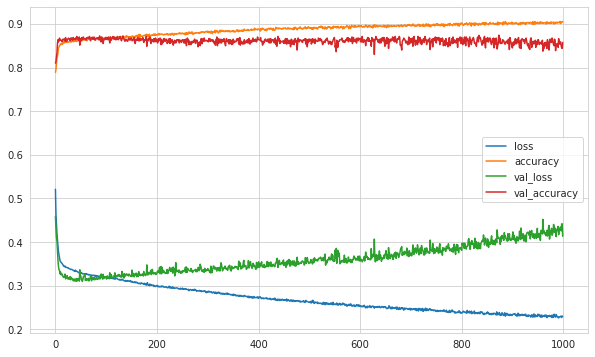

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [70]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5287758708000183
accuracy :  0.8259999752044678


In [71]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1472  121]
 [ 227  180]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1593
           1       0.60      0.44      0.51       407

    accuracy                           0.83      2000
   macro avg       0.73      0.68      0.70      2000
weighted avg       0.81      0.83      0.82      2000



## GridSearchCV

In [85]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [86]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [74]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [87]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

NameError: ignored

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
#for gridsearchcv model

y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("Churn_Prediction", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model.h5')

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___